# Проект: Статистический анализ данных сервиса аренды самокатов GoFast

___Заказчик исследования:___
сервис аренды самокатов GoFast. 

___Главная цель исследования:___ анализ данных и проверка гипотез, которые могут помочь бизнесу вырасти.

___Данные для анализа:___
данные о некоторых пользователях из нескольких городов, а также об их поездках и подписках.

___Основые задачи исследования:___


1. Выяснить, тратят ли пользователи с подпиской больше времени на поездки.
2. Выяснить, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
3. Выяснить, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4. Определить, какой тест необходимо использовать для оценки изменения количества обращений в техподдержку после для гипотетической ситуации обновления серверов, с которыми взаимодействует мобильное приложение. 
5. Работа с распределениями.

___План проведения исследования:___
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения
8. Общий вывод

___Дополнительные сведения___:

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться без подписки и с подпиской Ultra (отличие в отсутствии/наличии абонентской платы, стоимости старта и стоимости одной минуты поездки). Для подсчёта стоимости продолжительность каждой поездки в каждой строке исходного датафрейма округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26).

__Подготовка к исследованию__

Подключим библиотеки, необходимые для работы с данными. Выполним настройку формата отображения чисел с плавающей запятой.

In [256]:
# подключение библиотек
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings

# настройка формата отображения чисел с плавающей запятой
pd.set_option('display.float_format', '{:,.2f}'.format)

# отключение предупреждений
warnings.filterwarnings('ignore')

#### Загрузка данных

Загрузим данные о пользователях, поездках и подписках.

In [ ]:
# загрузка данных о пользователях
users = pd.read_csv('/datasets/users.csv')

In [ ]:
# загрузка данных о поездках
rides = pd.read_csv('/datasets/rides.csv', parse_dates=['date'])

In [ ]:
# загрузка данных о подписках
subscriptions = pd.read_csv('/datasets/subscriptions.csv')

 Выведем первые строки каждого набора данных и изучим общую информацию о каждом датафрейме.

In [260]:
def get_head_and_info(dataset):
    """
    Выводит первые 5 строк набора данных dataset
    и общую информацию о его структуре, типах данных,
    пропущенных значениях и других деталях (через метод info()).
    """
    display(dataset.head())
    # не используем display чтобы не было None в последней строке
    dataset.info()

In [261]:
# получим первые 5 строк и общую информацию о users
get_head_and_info(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Датасет `users` содержит 1565 записей, пропущенных значений нет, имена столбцов соответствуют змеиному регистру, типы данных определены верно.

In [262]:
# получим первые 5 строк и общую информацию о rides
get_head_and_info(rides)

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Датасет `rides` содержит 18068 записей, пропущенных значений нет, имена столбцов соответствуют змеиному регистру, типы данных определены верно, столбец date преобразован в нужный нам тип.

In [263]:
# получим первые 5 строк и общую информацию о subscriptions
get_head_and_info(subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Датасет `subscriptions` содержит всего 2 записи, пропущенных значений нет, имена столбцов соответствуют змеиному регистру, типы данных определены верно.

__Промежуточный вывод__:
- осуществили загрузку трех датасетов: о пользователях, поездках и подписках;
- пропущенные значения отсутствуют;
- переименование столбцов не требуется;
- парсинг столбца, в котором хранится дата поездки, осуществлен во время загрузки датасета `rides`. 

#### Предобработка данных

Создадим новый столбец с номером месяца на основе столбца date.

In [264]:
rides['month_number'] = pd.DatetimeIndex(rides['date']).month

Дополнительно взглянем, за какой период представлены данные.

In [265]:
rides['date'].sort_values()

0       2021-01-01
13113   2021-01-01
5445    2021-01-01
12775   2021-01-01
17096   2021-01-01
           ...    
15325   2021-12-30
7541    2021-12-30
6115    2021-12-30
10991   2021-12-30
11778   2021-12-30
Name: date, Length: 18068, dtype: datetime64[ns]

In [266]:
rides['month_number'].value_counts()

month_number
1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: count, dtype: int64

Выборка покрывает период с 01.01.2021 по 30.12.2021, данные есть за каждый месяц.

Удостоверимся, что пропусков в датасетах нет.

In [267]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [268]:
rides.isna().sum()

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64

In [269]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

До проверки на дубликаты, сделаем несколько дополнительных проверок. Убедимся, что имена записаны согласно правилу (первая буква - большая, остальные - маленькие), также посмотрим на уникальные значения столбцов, содержащих строковые значения.

In [270]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [271]:
# избавимся от 'ё' путем замены на 'е'
users['name'] = users['name'].replace('ё', 'е').replace('Ё', 'Е')

In [272]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [273]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Проблем не замечено.

Теперь проверим данные на наличие явных дубликатов.

In [274]:
users.duplicated().sum()

31

In [275]:
rides.duplicated().sum()

0

In [276]:
# отсутствие дубликатов здесь видно невооруженным взглядом, но проверку все равно проведем
subscriptions.duplicated().sum()

0

Дубликаты обнаружены в датасете users. Изучим их подробнее.

In [277]:
users[users.duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Т.к. согласно описанию данных данный датасет представляет собой информацию о пользователях, столбец `user_id` содержит уникальный идентификатор пользователя, ситуацию, что это разные люди с одинаковым именем и возрастом, проживающие в одном городе и имеющие одинаковый тип подписки, мы не рассматриваем. Удалим дубликаты.

In [278]:
users = users.drop_duplicates()

Проверим, есть ли записи с одинаковым `user_id`.

In [279]:
users.duplicated(['user_id']).sum()

0

Таких записей нет.

Узнаем количество уникальных user_id.

In [280]:
users['user_id'].nunique()

1534

In [281]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


__Промежуточный вывод__:
- cоздали столбец `month_number` с номером месяца на основе столбца `date`;
- убедились, что пропущенные значения отсутствуют;
- удалили явные дубликаты в датасете users, количество строк сократилось с 1565 до 1534. 

#### Исследовательский анализ данных

Изучим подробнее общую информацию о пользователях и поездках. 

Определим функцию, которую будем использовать для вычисления таких метрик как дисперсия, размах, межквартильный размах.

In [282]:
def calculate_metrics(df):
    """
    Функция вычисляет и выводит на экран значение дисперсии, размаха и межквартильного размаха для набора данных.
    """

    # Вычисление дисперсии
    mean = df.mean()
    var = 0
    for i in df:
        var += (i - mean) * (i - mean)
    var /= len(df)
    
    # Вычисление размаха
    range_value = df.max() - df.min()
    
    # Вычисление межквартильного размаха
    iqr_value = st.iqr(df)

    print(f'Дисперсия: {var:.2f}')
    print(f'Размах: {range_value:.2f}')
    print(f'Межквартильный размах: {iqr_value:.2f}')

Для получения информации о __частоте встречаемости городов__ нам понадобиться датасет _users_. Мы могли бы построить таблицу частот, используя ``users['city'].value_counts().sort_values(ascending=False)``, однако в данном случае нагляднее построить таблицу, содержащую также процент от общего числа.

In [283]:
grouped_data = (
    users
    .groupby('city')
    .agg(
        count_of_users=('user_id', 'count'),
        percent_of_users=('user_id', lambda x: 100*x.count()/users.shape[0]))
    .sort_values(by='count_of_users', ascending=False)
)
grouped_data

,count_of_users,percent_of_users
city,,
Пятигорск,219,14.28
Екатеринбург,204,13.30
Ростов-на-Дону,198,12.91
Краснодар,193,12.58
Сочи,189,12.32
Омск,183,11.93
Тюмень,180,11.73
Москва,168,10.95


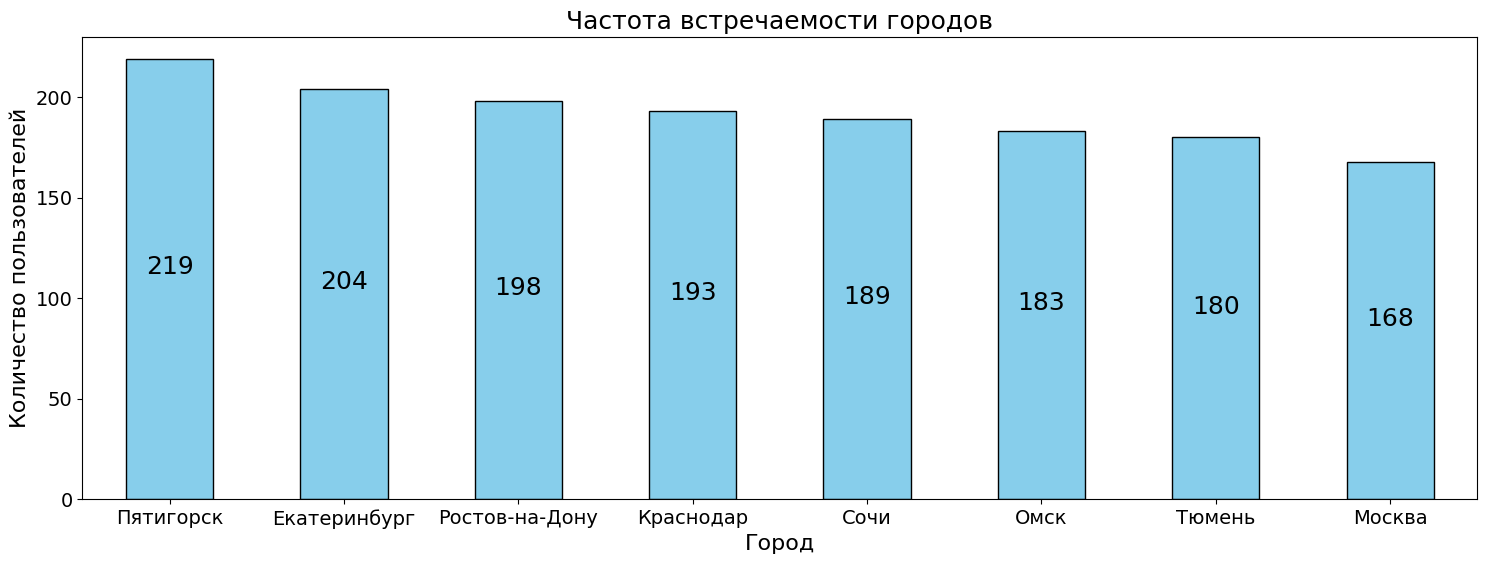

In [284]:
# построим столбчатую диаграмму
ax = grouped_data['count_of_users'].plot.bar(
    legend=False, figsize = (18,6), rot=0, fontsize=14,  color='skyblue', edgecolor='black')
ax.set_title('Частота встречаемости городов', fontsize = 18)
ax.set_xlabel('Город', fontsize = 16)
ax.set_ylabel('Количество пользователей', fontsize = 16)

# Выводим значения над каждым столбцом
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height() / 2.), ha='center', va='bottom', fontsize=18)
    
plt.show()

В выборке представлена информация о пользователях из 8 городов: Тюмени, Омска, Москвы, Ростова-на-Дону, Краснодара, Пятигорска, Екатеринбурга и Сочи. Больше всего в выборке пользователей из Пятигорска - 14.28%, меньше всего - из Москвы - 10.95%. Нельзя сказать, что какой-то из городов представлен в недостаточной степени по сравнению с остальными.

Дополним таблицу с сгруппированными данными  информацией, найденной в [Википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9), о численности населения городов на начало 2021 года. Добавим на нашу столбчатую диаграмму второй график с численностью населения.

In [285]:
citizens = {
    'city': ['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'],
    'population': [847, 1126, 13010, 1142, 1099, 146, 1544, 466] # тыс.чел.
}
# Создаем DataFrame из citizens
citizens_df = pd.DataFrame(citizens)
merged_data = grouped_data.merge(citizens_df, on='city')

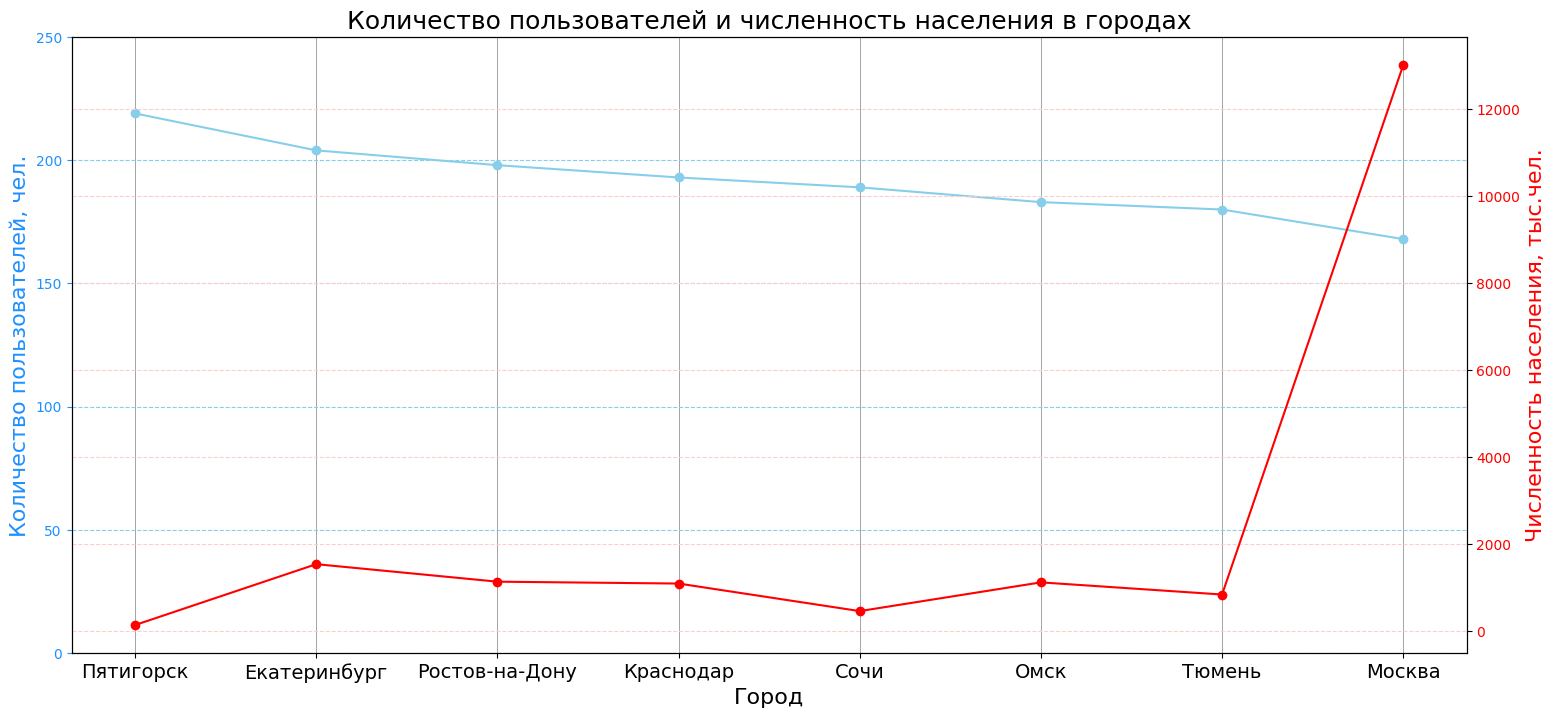

In [286]:
# построим графики численности населения и количества пользователей
fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.plot(merged_data['city'], merged_data['count_of_users'], color='skyblue', marker='o', linestyle='-')
ax1.set_xlabel('Город', fontsize = 16)
ax1.set_ylabel('Количество пользователей, чел.', fontsize = 16, color='dodgerblue')
ax1.set_ylim(0, 250)
ax1.set_xticks(range(len(merged_data['city'])))
ax1.set_xticklabels(merged_data['city'], fontsize=14)
ax1.tick_params(axis='y', colors='dodgerblue') 

ax2 = ax1.twinx()
ax2.set_ylabel('Численность населения, тыс.чел.', color='red', fontsize = 16)
ax2.plot(merged_data['city'], merged_data['population'], color='red', marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor='red')

ax1.grid(axis='y', color='skyblue', linestyle='--')  # Сетка для оси y на графике 1
ax2.grid(axis='y', color='#FFCCCC', linestyle='--')  # Сетка для оси y на графике 2

ax1.xaxis.grid(True, linestyle='-', color='grey', linewidth=0.5)  # Сетка для оси x на графике

plt.title('Количество пользователей и численность населения в городах', fontsize = 18)
plt.show()

Численность населения Москвы во много раз превышает численность населения в других городах, но, при этом, меньше всего пользователей из этого города. Вместе с тем, в Пятигорске ситуация обратная. Мы анализировали ситуацию за 2021 год, стоит повторить анализ на более свежих данных и, в случае повторения ситуации, изучить причины низкого количества пользователей в Москве и рассмотреть вопрос о привлечении целевой аудитории к использованию сервиса.

Для определения __соотношения пользователей с подпиской и без подписки__ посмотрим на параметр `subscription_type` (из описания данных следует, что если значение равно "free" - нет подписки, "ultra" - есть подписка).

In [287]:
grouped_data = (
    users
    .groupby('subscription_type')
    .agg(
        count_of_users=('user_id', 'count'),
        percent_of_users=('user_id', lambda x: 100*x.count()/users.shape[0]))
)
grouped_data

,count_of_users,percent_of_users
subscription_type,,
free,835,54.43
ultra,699,45.57


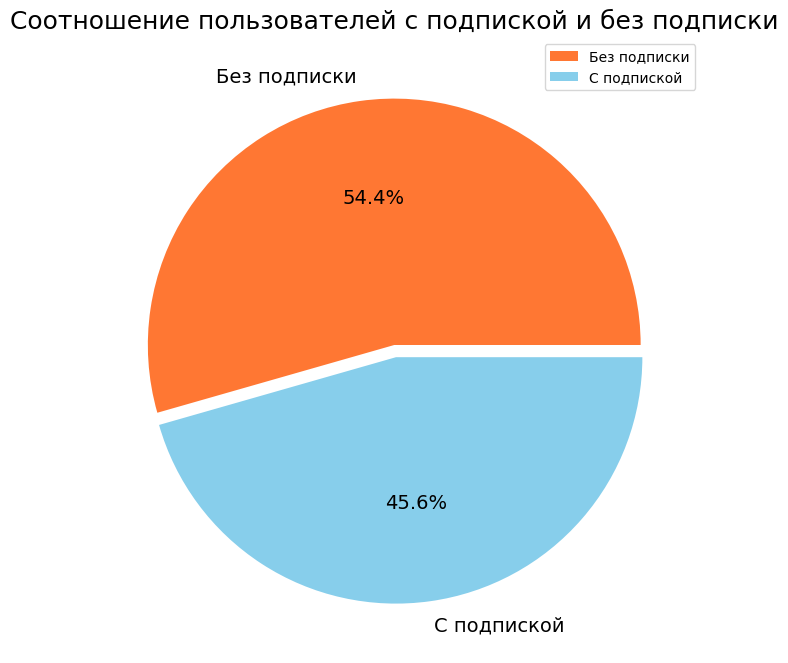

In [288]:
# добавим круговую диаграмму
ax = (
    grouped_data['count_of_users']
    .plot.pie(
        figsize=(8, 8),
        
        autopct='%1.1f%%',
        ylabel='',
        legend=True,  
        labels=['Без подписки', 'С подпиской'], 
        explode=(0, 0.05),
        fontsize=14,
        colors = ['#FF7733', 'skyblue']
    )
)
ax.set_title('Cоотношение пользователей с подпиской и без подписки', fontsize=18)
plt.show()

Как видим, в нашей выборке больше пользователей без подписки - 835 (54.43%) против 699 (45.57%) пользователей с подпиской.

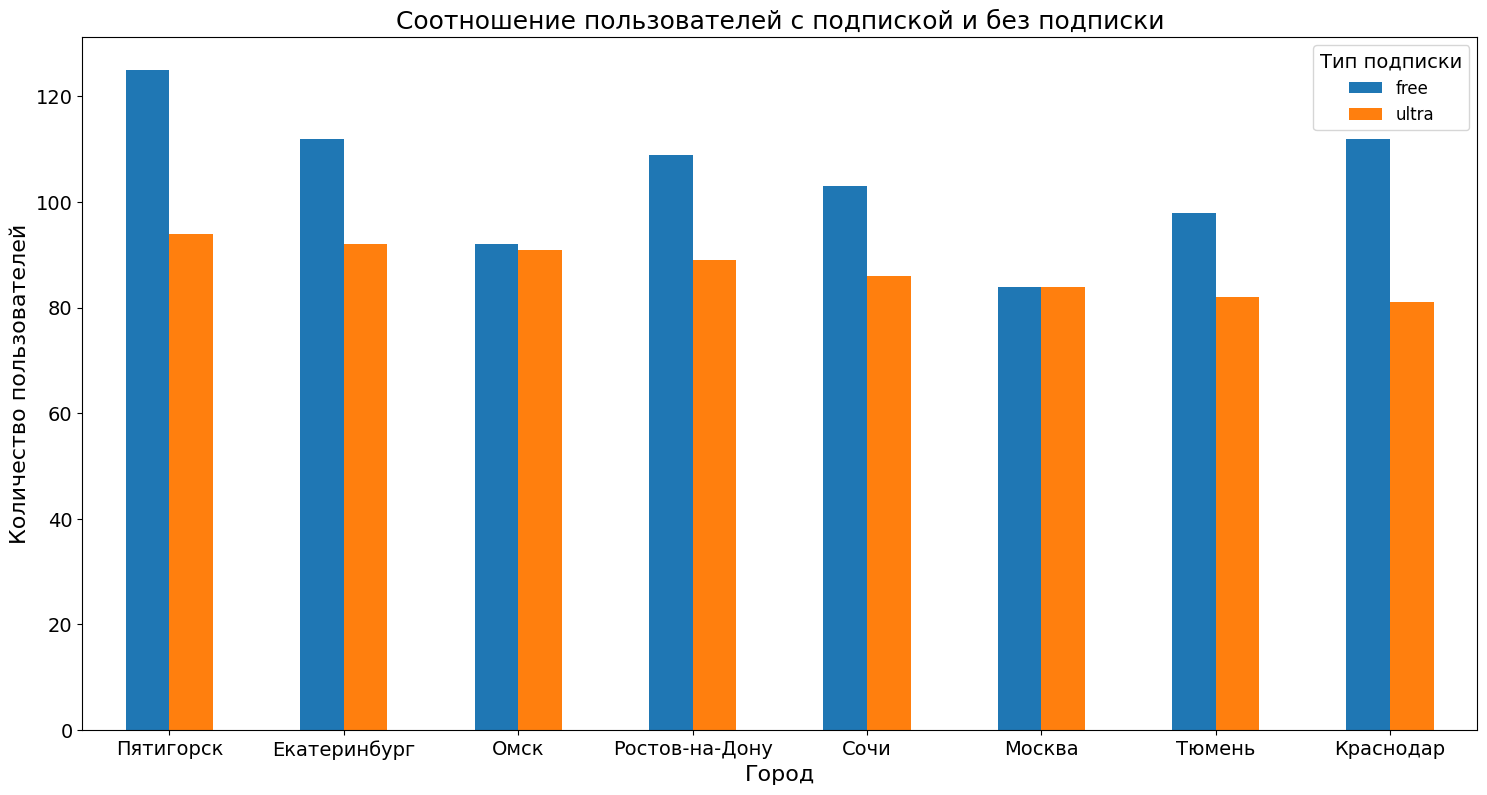

In [289]:
# построим диаграмму соотношения пользователей с подпиской и без подписки по городам
ax = (
    users
    .groupby(['city', 'subscription_type'])
    .size().unstack()
    .sort_values(by='ultra', ascending=False) # Сортировка по количеству пользователей с подпиской
    .plot(kind='bar', figsize=(18, 9), fontsize = 14)
)
ax.set_title('Cоотношение пользователей с подпиской и без подписки', fontsize = 18)
ax.set_xlabel('Город', fontsize = 16)
ax.set_ylabel('Количество пользователей', fontsize = 16)
ax.legend(title='Тип подписки', fontsize=12, title_fontsize=14)

# Улучшение внешнего вида графика
plt.xticks(rotation=0) 

plt.show()

Если посмотреть на соотношение по городам, то для нашей выборки число пользователей без подписки всегда превышает либо равно числу пользователей с подпиской независимо от города. Для Омска и Москвы число пользователей обеих категорий практически равно. Наибольшая разница наблюдается для Пятигорска и Краснодара.

Изучим информацию о __возрасте пользователей__.

In [290]:
# получим описание данных
users['age'].describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

In [291]:
calculate_metrics(users['age'])

Дисперсия: 20.89
Размах: 31.00
Межквартильный размах: 6.00


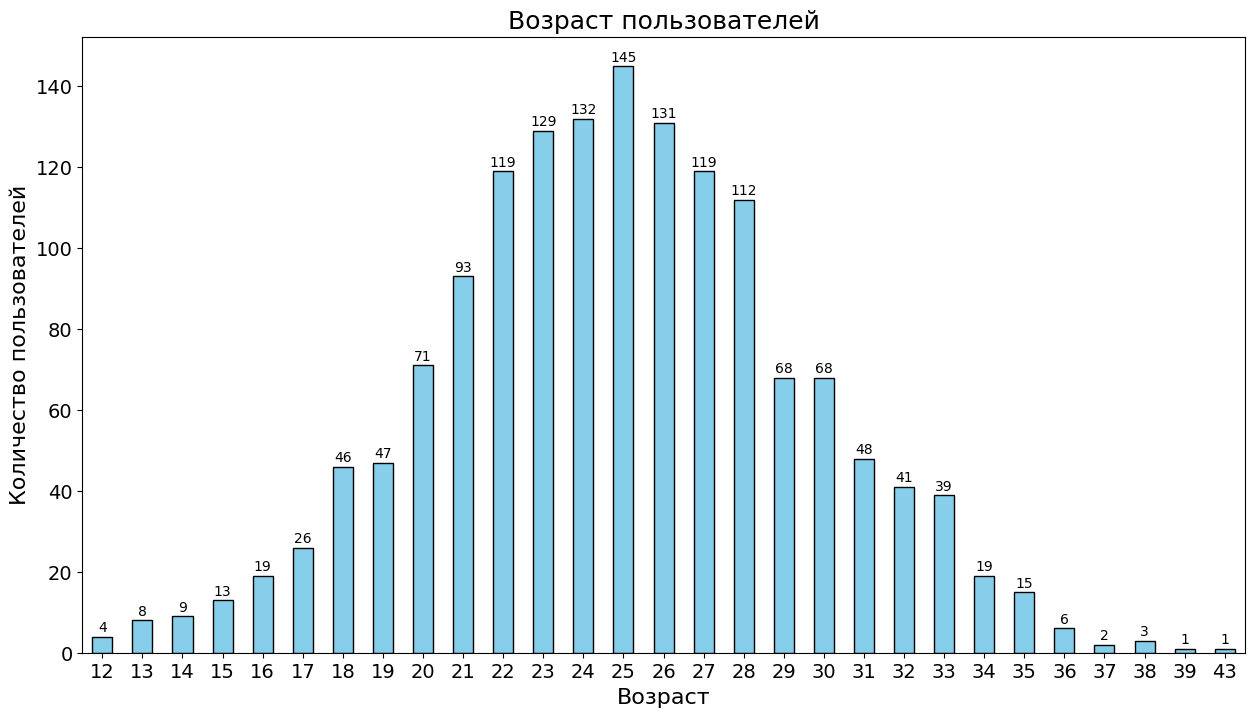

In [292]:
# построим столбчатую диаграмму для визуализации возраста пользователей
ax = users.groupby('age')['user_id'].agg('count').plot.bar(
    figsize = (15,8), rot=0, fontsize=14, color='skyblue', edgecolor='black')

ax.set_title('Возраст пользователей', fontsize = 18)
ax.set_xlabel('Возраст', fontsize = 16)
ax.set_ylabel('Количество пользователей', fontsize = 16)

# Добавление подписей к столбцам (опционально)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center', va='bottom')
    
plt.show()

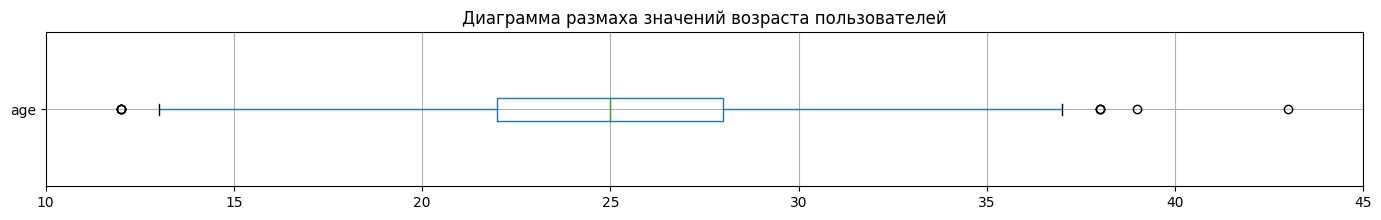

In [293]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = users[['age']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений возраста пользователей')
ax.set_xlim(10, 45);

В датасете представлена информация о пользователях от 12 до 43 лет. Самое частое значение возраста (мода данной характеристики) сопадает с медианным значением и составляет 25 лет. Средний возраст практически не отличается от медианного - 24.9. Возраст половины пользователей находится в диапазоне от 22 до 28 лет. Редкими значениями для нашей выборки является возраст пользователей младше 13 лет и старше 37. Размах равен 31 год, межквартильный размах - 6 лет. Дисперсия - 20.89 лет². Стандартное отклонение - 4.57 лет. 

Изучим __расстояние, которое пользователь преодолевает за одну поездку__. Для этого обратимся к параметру `distance` датасета _rides_.

In [294]:
# получим описание данных
rides['distance'].describe()

count   18,068.00
mean     3,070.66
std      1,116.83
min          0.86
25%      2,543.23
50%      3,133.61
75%      3,776.22
max      7,211.01
Name: distance, dtype: float64

In [295]:
calculate_metrics(rides['distance'])

Дисперсия: 1247242.91
Размах: 7210.15
Межквартильный размах: 1233.00


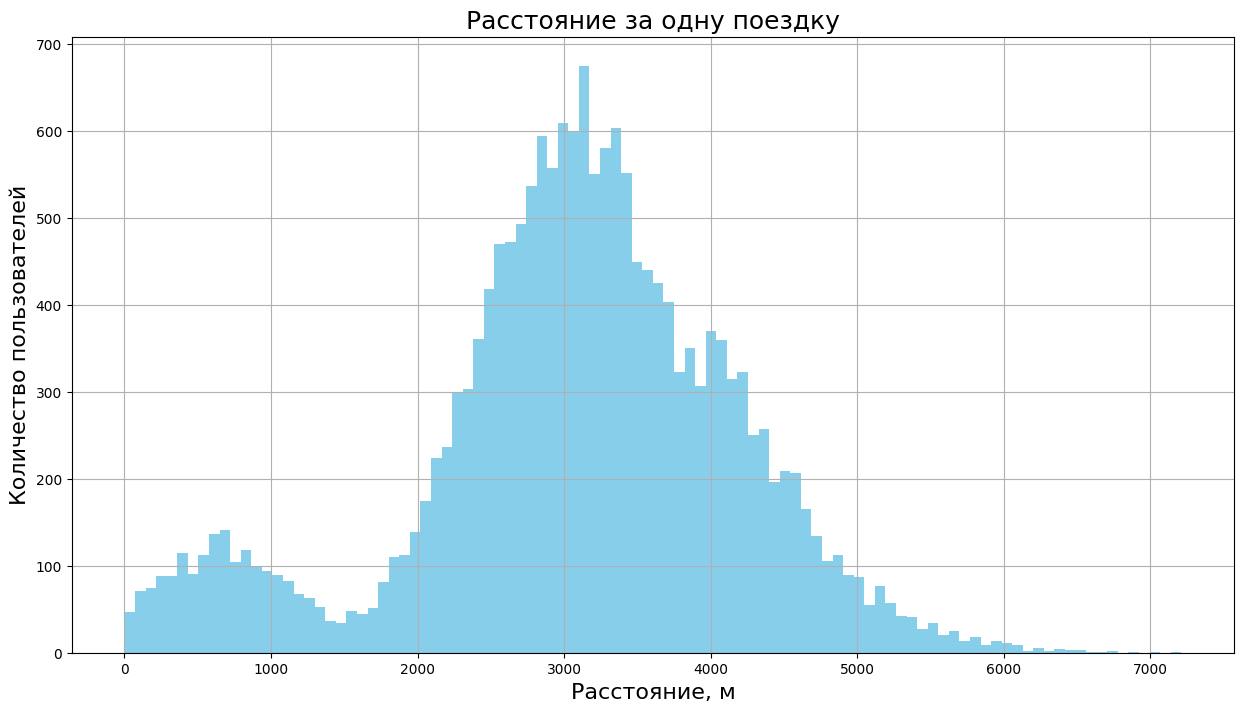

In [296]:
# построим гистограмму, т.к. величина непрерывная
ax = rides['distance'].hist( bins = 100,
    figsize = (15,8),  color='skyblue')

ax.set_title('Расстояние за одну поездку', fontsize = 18)
ax.set_xlabel('Расстояние, м', fontsize = 16)
ax.set_ylabel('Количество пользователей', fontsize = 16)
   
plt.show()

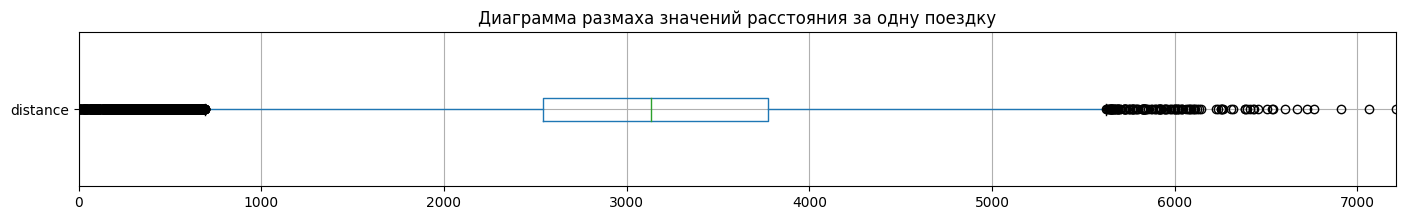

In [297]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = rides[['distance']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояния за одну поездку')
ax.set_xlim(0, 7212);

Значения расстояний, преодолеваемых пользователем за одну поездку, распределены в диапазоне от 0.86 до 7,211.01 м. Медианное значение - 3,133.61 м, среднее довольно близко к медианному - 3,070.66 м, несмотря на наличие выбросов. Дисперсия равна 1247242.91 кв.м, стандартное отклонение - 1,116.83 м. Размах равен 7210.15 м, межквартильный размах - 1233.00 м. Половина значений находится в диапазоне от 2,543.23 м до 3,776.22 м. 

На гистограмме выделяются два холма, первый - более короткие поездки, приблизительно до 1500 м с пиком около 650 м,  второй, соответственно, более 1500 м с пиком около 3100 м. Появление двух пиков требует дополнительного анализа, много факторов могли стать причиной этого: наличие инфраструктуры в конкретной местности, наличие развитой сети общественного транспорта, например, одной из причин появления отдельного пика для коротких поездок может быть цель пользователя - добраться до ближайшей станции метро либо другого общественного транспорта, также это может быть связано с пробными заездами новых пользователей.

Попробуем выяснить, какая группа пользователей чаще всего совершает короткие поездки. 

In [298]:
# нам нужно получить таблицу, содержащую данные о поездках и пользователях
merged_data = rides.merge(users, on='user_id', how='left')

# проверим размерность и пропуски
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month_number       18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 1.2+ MB


In [299]:
# выделим информацию о коротких поездках до 1500 м
data_short_distance = merged_data.query('distance < 1500')

# проверим размерность и пропуски
data_short_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1796 entries, 2 to 18058
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1796 non-null   int64         
 1   distance           1796 non-null   float64       
 2   duration           1796 non-null   float64       
 3   date               1796 non-null   datetime64[ns]
 4   month_number       1796 non-null   int32         
 5   name               1796 non-null   object        
 6   age                1796 non-null   int64         
 7   city               1796 non-null   object        
 8   subscription_type  1796 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 133.3+ KB


In [300]:
# посмотрим на описание данных
data_short_distance.describe()

,user_id,distance,duration,date,month_number,age
count,"1,796.00","1,796.00","1,796.00",1796,"1,796.00","1,796.00"
mean,926.05,703.89,10.17,2021-07-02 09:06:00.801781760,6.54,24.85
min,1.00,0.86,2.04,2021-01-01 00:00:00,1.00,12.00
25%,674.50,414.32,6.92,2021-03-27 00:00:00,3.00,22.00
50%,982.00,687.54,10.09,2021-07-04 00:00:00,7.00,25.00
75%,"1,258.00",985.43,13.46,2021-10-05 06:00:00,10.00,28.00
max,"1,534.00","1,499.57",20.46,2021-12-30 00:00:00,12.00,43.00
std,413.26,368.35,3.96,NaN,3.51,4.57


Интересных закономерностей для возраста или месяца поездки не обнаружено.

In [301]:
# проверим данные по городам
data_short_distance.groupby('city')['distance'].agg('count').sort_values()

city
Москва            168
Омск              203
Тюмень            206
Пятигорск         220
Сочи              228
Екатеринбург      246
Краснодар         247
Ростов-на-Дону    278
Name: distance, dtype: int64

По Москве коротких поездок меньше всего. Но и количество пользователей там, как мы выяснили, меньше. 

In [302]:
# поищем зависимость от месяца поездки
data_short_distance.groupby('month_number')['distance'].agg('count').sort_values()

month_number
5     128
4     137
7     139
6     142
2     143
9     147
10    150
11    157
12    158
1     159
8     167
3     169
Name: distance, dtype: int64

Интересных закономерностей не обнаружено.

In [303]:
# сгруппируем по типу подписки
data_short_distance.groupby('subscription_type')['distance'].agg('count')

subscription_type
free     1328
ultra     468
Name: distance, dtype: int64

In [304]:
# выделим информацию о коротких поездках до 1500 м
data_long_distance = merged_data.query('distance >= 1500')

# проверим размерность и пропуски
data_long_distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16272 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            16272 non-null  int64         
 1   distance           16272 non-null  float64       
 2   duration           16272 non-null  float64       
 3   date               16272 non-null  datetime64[ns]
 4   month_number       16272 non-null  int32         
 5   name               16272 non-null  object        
 6   age                16272 non-null  int64         
 7   city               16272 non-null  object        
 8   subscription_type  16272 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 1.2+ MB


In [305]:
# сгруппируем по типу подписки
data_long_distance.groupby('subscription_type')['distance'].agg('count')

subscription_type
free     10240
ultra     6032
Name: distance, dtype: int64

Как мы видим, пользователи без подписки совершили в 2,8 раза больше поездок на короткие дистанции, в то время как для длинных дистанций разница в 1,7 раз. 

Рассмотрим __продолжительность поездок__.

In [306]:
# получим описание данных
rides['duration'].describe()

count   18,068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

In [307]:
calculate_metrics(rides['duration'])

Дисперсия: 37.10
Размах: 40.32
Межквартильный размах: 8.13


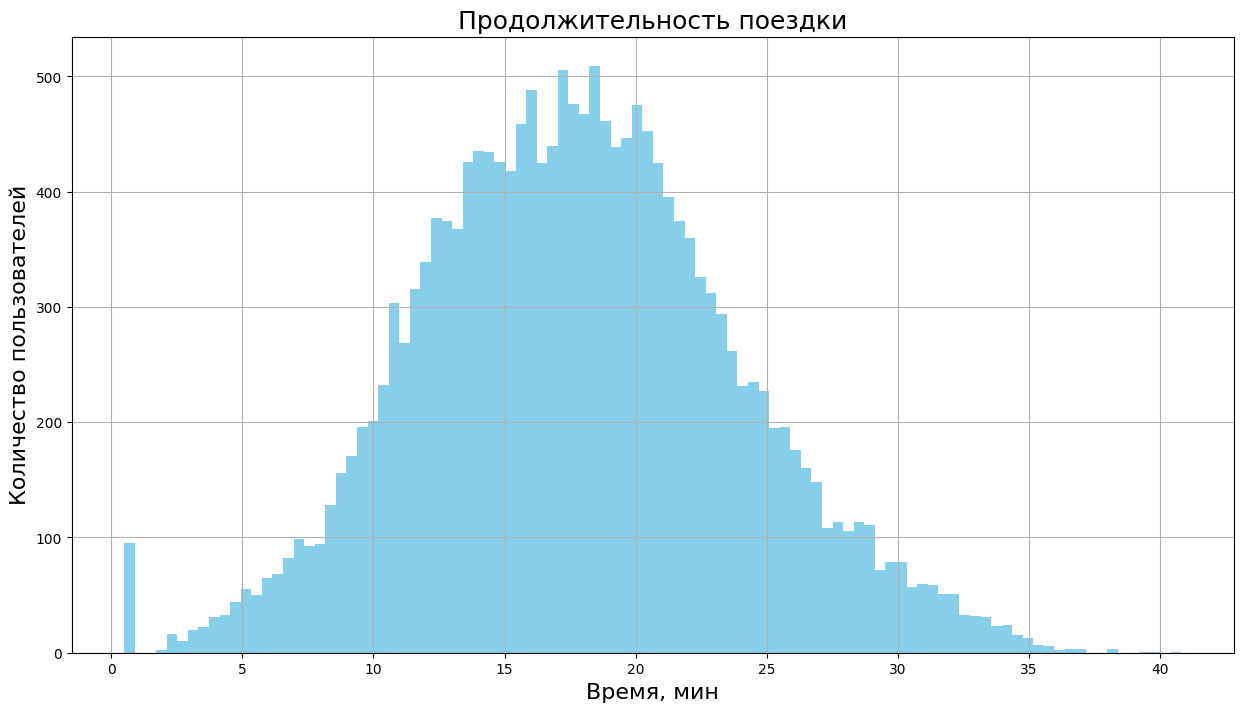

In [308]:
# построим гистограмму, т.к. величина непрерывная
ax = rides['duration'].hist( bins = 100,
    figsize = (15,8),  color='skyblue')
ax.set_title('Продолжительность поездки', fontsize = 18)
ax.set_xlabel('Время, мин', fontsize = 16)
ax.set_ylabel('Количество пользователей', fontsize = 16)
   
plt.show()

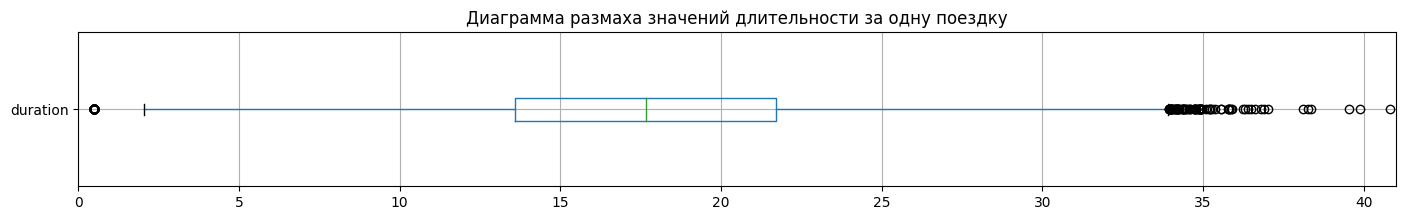

In [309]:
# построим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = rides[['duration']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений длительности за одну поездку')
ax.set_xlim(0, 41);

In [310]:
# проверим, как распределены значения, правило трех сигм

# Вычисляем среднее и стандартное отклонение
mean = np.mean(rides['duration'])
std_deviation = np.std(rides['duration'])

# Подсчитываем долю значений в пределах одной и трех сигм
within_three_sigma = np.mean(
    (rides['duration'] >= mean - 3 * std_deviation) & (rides['duration'] <= mean + 3 * std_deviation))
within_one_sigma = np.mean(
    (rides['duration'] >= mean - std_deviation) & (rides['duration'] <= mean + std_deviation))
within_two_sigma = np.mean(
    (rides['duration'] >= mean - 2 * std_deviation) & (rides['duration'] <= mean + 2 * std_deviation))

print(f"Доля значений в пределах одной сигмы: {within_one_sigma}")
print(f"Доля значений в пределах двух сигм: {within_two_sigma}")
print(f"Доля значений в пределах трех сигм: {within_three_sigma}")

Доля значений в пределах одной сигмы: 0.6901151206553022
Доля значений в пределах двух сигм: 0.9497454062430817
Доля значений в пределах трех сигм: 0.999225149435466


Значения продолжительности поездок распределены в диапазоне от 0.5 до 40.82 мин. Медианное значение - 17.68 мин, среднее, несмотря на наличие выбросов, довольно близко к медианному - 17.81 мин. Дисперсия равна 37.10 мин², стандартное отклонение - 6.09 мин. Половина значений находится в диапазоне от 13.60 мин до 21.72 мин. Размах равен 40.32 мин, межквартильный размах - 8.13 мин. Значения меньше 3 мин и более 34 мин (ориентировочно) встречаются очень редко. Распределение имеет форму колокола, симметрично, с одним пиком. Правило трех сигм выполняется. Можем сказать, что оно тяготеет к нормальному. Можно предположить, что поездки длиной до 3 минут - сбой приложения, либо пользователь передумал совершать поездку (например, приехал общественный транспорт, или резко испортилась погода).

Посмотрим на поездки, сгруппированные по сезонам.

In [311]:
seasons = {1: 'зима', 2: 'зима', 3: 'весна', 4: 'весна', 5: 'весна', 6: 'лето',
           7: 'лето', 8: 'лето', 9: 'осень', 10: 'осень', 11: 'осень', 12: 'зима'}

# Добавим столбец "Season" на основе словаря
merged_data['season'] = merged_data['month_number'].map(seasons)

merged_data

,user_id,distance,duration,date,month_number,name,age,city,subscription_type,season
0,1,"4,409.92",25.60,2021-01-01,1,Кира,22,Тюмень,ultra,зима
1,1,"2,617.59",15.82,2021-01-18,1,Кира,22,Тюмень,ultra,зима
2,1,754.16,6.23,2021-04-20,4,Кира,22,Тюмень,ultra,весна
3,1,"2,694.78",18.51,2021-08-11,8,Кира,22,Тюмень,ultra,лето
4,1,"4,028.69",26.27,2021-08-28,8,Кира,22,Тюмень,ultra,лето
...,...,...,...,...,...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11,Альберт,25,Краснодар,free,осень
18064,1534,"2,840.42",21.41,2021-11-16,11,Альберт,25,Краснодар,free,осень
18065,1534,"3,826.19",18.44,2021-11-18,11,Альберт,25,Краснодар,free,осень
18066,1534,"2,902.31",16.67,2021-11-27,11,Альберт,25,Краснодар,free,осень


In [312]:
merged_data.groupby('season').describe().T

season                                      весна  \
user_id      count                       4,610.00   
             mean                          837.09   
             min                             1.00   
             25%                           471.25   
             50%                           879.50   
             75%                         1,213.00   
             max                         1,534.00   
             std                           438.50   
distance     count                       4,610.00   
             mean                        3,068.51   
             min                             4.33   
             25%                         2,541.69   
             50%                         3,128.67   
             75%                         3,757.24   
             max                         7,211.01   
             std                         1,095.03   
duration     count                       4,610.00   
             mean                           17.84   
             min                             0.50   
             25%                            13.78   
             50%                            17.73   
             75%                            21.68   
             max                            38.35   
             std                             6.00   
date         count                           4610   
             mean   2021-04-15 14:35:14.707158528   
             min              2021-03-01 00:00:00   
             25%              2021-03-24 00:00:00   
             50%              2021-04-15 00:00:00   
             75%              2021-05-09 00:00:00   
             max              2021-05-31 00:00:00   
             std                              NaN   
month_number count                       4,610.00   
             mean                            4.00   
             min                             3.00   
             25%                             3.00   
             50%                             4.00   
             75%                             5.00   
             max                             5.00   
             std                             0.82   
age          count                       4,610.00   
             mean                           25.00   
             min                            12.00   
             25%                            22.00   
             50%                            25.00   
             75%                            28.00   
             max                            43.00   
             std                             4.60   

season                                       зима  \
user_id      count                       4,448.00   
             mean                          843.11   
             min                             1.00   
             25%                           495.00   
             50%                           888.00   
             75%                         1,211.00   
             max                         1,534.00   
             std                           432.49   
distance     count                       4,448.00   
             mean                        3,085.41   
             min                             0.86   
             25%                         2,550.63   
             50%                         3,152.38   
             75%                         3,816.21   
             max                         7,066.00   
             std                         1,142.06   
duration     count                       4,448.00   
             mean                           17.80   
             min                             0.50   
             25%                            13.55   
             50%                            17.63   
             75%                            21.84   
             max                            40.82   
             std                             6.20   
date         count                           4448   
             mean   2021

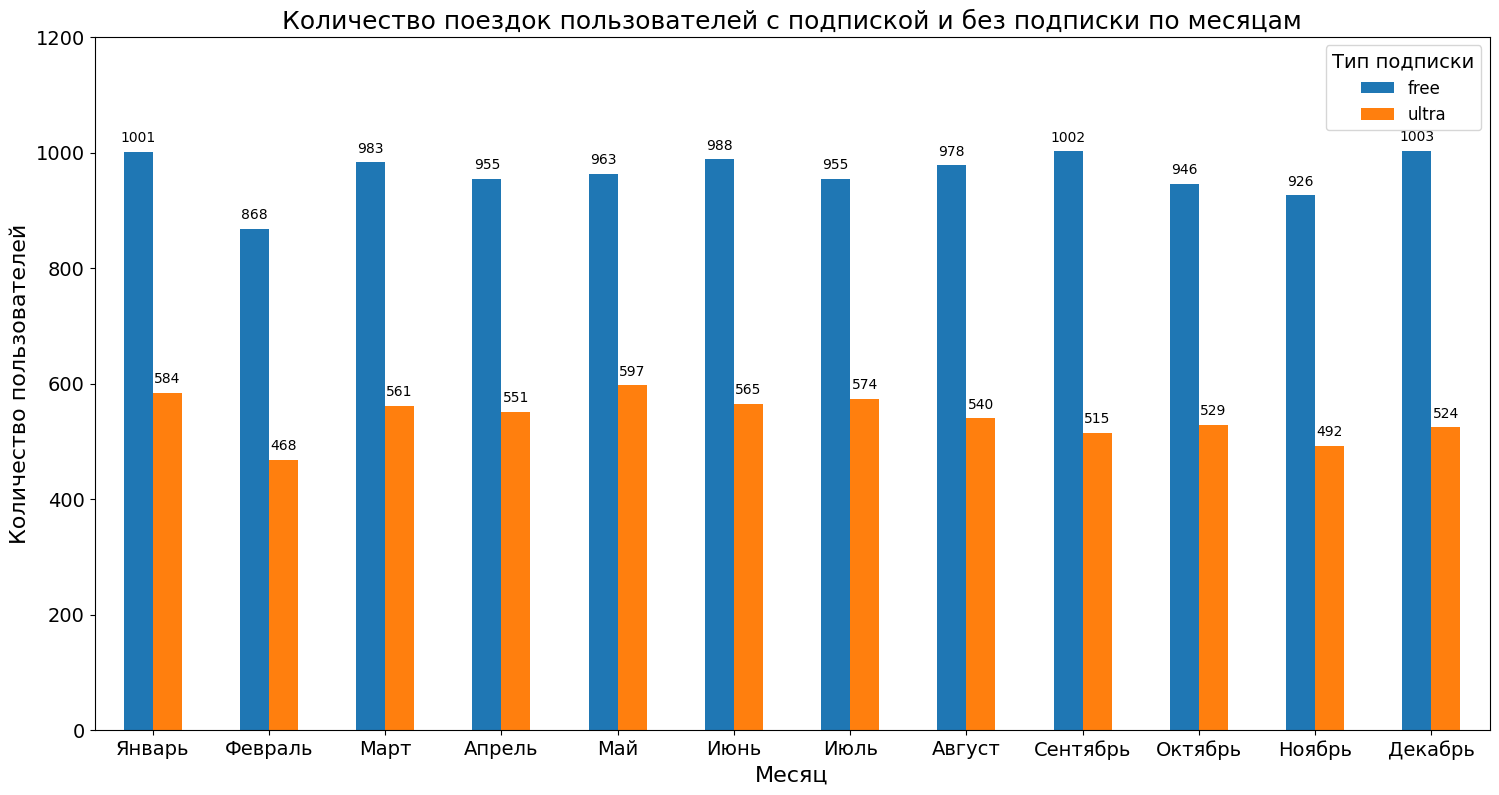

In [313]:
# построим график количества поездок по месяцам в зависимости от подписки
# не сортируем, т.к. хотим сохранить порядок месяцев

month_names_ru = ['Январь', 'Февраль', 'Март',  'Апрель', 'Май', 'Июнь',
                  'Июль',   'Август',  'Сентябрь',   'Октябрь',   'Ноябрь',  'Декабрь']
ax = (
    merged_data
    .groupby(['month_number', 'subscription_type'])
    .size().unstack()
    .plot(kind='bar', figsize=(18, 9), fontsize = 14)
)
ax.set_title('Количество поездок пользователей с подпиской и без подписки по месяцам', fontsize = 18)
ax.set_xlabel('Месяц', fontsize = 16)
ax.set_ylabel('Количество пользователей', fontsize = 16)
ax.legend(title='Тип подписки', fontsize=12, title_fontsize=14)
ax.set_ylim(0, 1200)

# Добавление значений к столбцам
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
    
# Замена номеров месяцев на названия на русском языке
plt.xticks(ticks=range(len(month_names_ru)), labels=month_names_ru, rotation=0)
plt.show()

Можно сказать, что:
- количество поездок в сезонах изменяется незначительно, от 4410 до 4610, количество поездок весной и летом незначительно превышает количество поездок осенью и зимой,
- медианные значения, стандартные отклонения, границы межквартильного размаха для расстояний, преодолеваемых пользователем за одну поездку, длительности одной поездки, возраста пользователей, также незначительно отличаются в разных сезонах,
- самое низкое количество поездок для обеих групп пользователей в феврале и ноябре, максимальное количество поездок для пользователей с подпиской - в декабре(1003), сентябре(1002), январе(1001), для пользователей с подпиской - в мае(597).

Данные указывают на довольно стабильное использование сервиса в разные сезоны с небольшим увеличением спроса весной и летом. Наблюдается снижение количества поездок в феврале и ноябре для пользователей независимо от наличия подписки.

__Промежуточный вывод__:
-  В выборке представлена информация о пользователях _из 8 городов_: Тюмени, Омска, Москвы, Ростова-на-Дону, Краснодара, Пятигорска, Екатеринбурга и Сочи. Больше всего в выборке пользователей из Пятигорска - 14.28%, меньше всего - из Москвы - 10.95%.
-  В выборке больше пользователей _без подписки_ - 835 (54.43%) против 699 (45.57%) пользователей _с подпиской_. Если посмотреть на соотношение по городам, то для нашей выборки число пользователей без подписки всегда превышает либо равно числу пользователей с подпиской независимо от города. Для Омска и Москвы число пользователей обеих категорий практически равно. Наибольшая разница наблюдается для Пятигорска и Краснодара.
- Численность населения Москвы во много раз превышает численность населения в других городах, но, при этом, меньше всего пользователей из этого города. Вместе с тем, в Пятигорске ситуация обратная. Мы анализировали ситуацию за 2021 год, стоит повторить анализ на более свежих данных и, в случае повторения ситуации, изучить причины низкого количества пользователей в Москве и рассмотреть вопрос о привлечении целевой аудитории в этом городе к использованию сервиса.
- _Возраст пользователей_ находится в диапазоне от 12 до 43 лет. Мода сопадает с медианным значением и составляет 25 лет. Средний возраст - 24.9. Возраст половины пользователей находится в диапазоне от 22 до 28 лет. Редкими значениями  является возраст пользователей младше 13 лет и старше 37. Размах равен 31 год, межквартильный размах - 6 лет. Дисперсия - 20.89 лет². Стандартное отклонение - 4.57 лет.
- Значения _расстояний, преодолеваемых пользователем за одну поездку_, распределены в диапазоне от 0.86 до 7,211.01 м. Медианное значение - 3,133.61 м, среднее - 3,070.66 м. Дисперсия равна 1247242.91 кв.м, стандартное отклонение - 1,116.83 м. Размах равен 7210.15 м, межквартильный размах - 1233.00 м. Половина значений находится в диапазоне от 2,543.23 м до 3,776.22 м. На гистограмме выделяются два холма, первый - более короткие поездки, приблизительно до 1500 м с пиком около 650 м, второй, соответственно, более 1500 м с пиком около 3100 м. Появление двух холмов требует дополнительного анализа, много факторов могли стать причиной этого: наличие инфраструктуры в конкретной местности, наличие развитой сети общественного транспорта, например, одной из причин появления отдельного пика для коротких поездок может быть цель пользователя - добраться до ближайшей станции метро либо другого общественного транспорта, также это может быть связано с пробными заездами новых пользователей.  Стоит отметить, что пользователи без подписки совершили в 2,8 раза больше поездок на короткие дистанции, в то время как для длинных дистанций разница в 1,7 раз.
- Значения _продолжительности поездок_ распределены в диапазоне от 0.5 до 40.82 мин. Медианное значение - 17.68 мин, среднее - 17.81 мин. Дисперсия равна 37.10 мин², стандартное отклонение - 6.09 мин. Размах равен 40.32 мин, межквартильный размах - 8.13 мин.  Половина значений находится в диапазоне от 13.60 мин до 21.72 мин. Значения меньше 3 мин и более 34 мин встречаются очень редко. Распределение имеет форму колокола, симметрично, с одним пиком. Правило трех сигм выполняется. Можем сказать, что оно тяготеет к нормальному. Можно предположить, что поездки длиной до 3 минут - сбой приложения, либо пользователь передумал совершать поездку (например, приехал общественный транспорт, или резко испортилась погода).
- количество поездок в сезонах изменяется незначительно, от 4410 до 4610, количество поездок весной и летом незначительно превышает количество поездок осенью и зимой, медианные значения, стандартные отклонения, границы межквартильного размаха для расстояний, преодолеваемых пользователем за одну поездку, длительности одной поездки, возраста пользователей, незначительно отличаются в разных сезонах. Самое низкое количество поездок для обеих групп пользователей в феврале и ноябре, максимальное количество поездок для пользователей с подпиской - в декабре(1003), сентябре(1002), январе(1001), для пользователей с подпиской - в мае(597). Данные указывают на довольно стабильное использование сервиса в разные сезоны с небольшим увеличением спроса весной и летом. Наблюдается снижение количества поездок в феврале и ноябре для пользователей независимо от наличия подписки.

#### Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [314]:
# объединим данные в одну таблицу
data = (
    rides
    .merge(users, on='user_id', how='left')
    .merge(subscriptions, on='subscription_type', how='left')
)

In [315]:
# посмотрим на результат
data

,user_id,distance,duration,date,month_number,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,409.92",25.60,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,617.59",15.82,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,6.23,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,694.78",18.51,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,028.69",26.27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,"2,840.42",21.41,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,"3,826.19",18.44,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,"2,902.31",16.67,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Количество строк совпадает с количеством строк в таблице rides. Убедимся, что число уникальных пользователей не изменилось для итогового датафрейма.

In [316]:
data['user_id'].nunique()

1534

Убедимся, что нет пропусков в итоговой таблице.

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month_number       18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Размерность таблицы `data`, содержащей все объединенные данные - 18068 записей, 12 столбцов. Пропущенных значений нет.

Создадим ещё два датафрейма:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [318]:
rides_without_subscription = data[data['subscription_type'] == 'free']

In [319]:
rides_with_subscription = data[data['subscription_type'] == 'ultra']

Получим общую информацию о получившихся после разделения таблиц, убедимся, что не появились пропуски.

In [320]:
rides_without_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month_number       11568 non-null  int32         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


In [321]:
rides_with_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month_number       6500 non-null   int32         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


Размерность таблицы `rides_without_subscription`, содержащей данные о пользователях без подписки - 11568 записей, таблицы `rides_with_subscription`, содержащей данный о пользователях с подпиской - 6500 записей. Суммарное количество записей не изменилось, пропущенных значений нет.

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

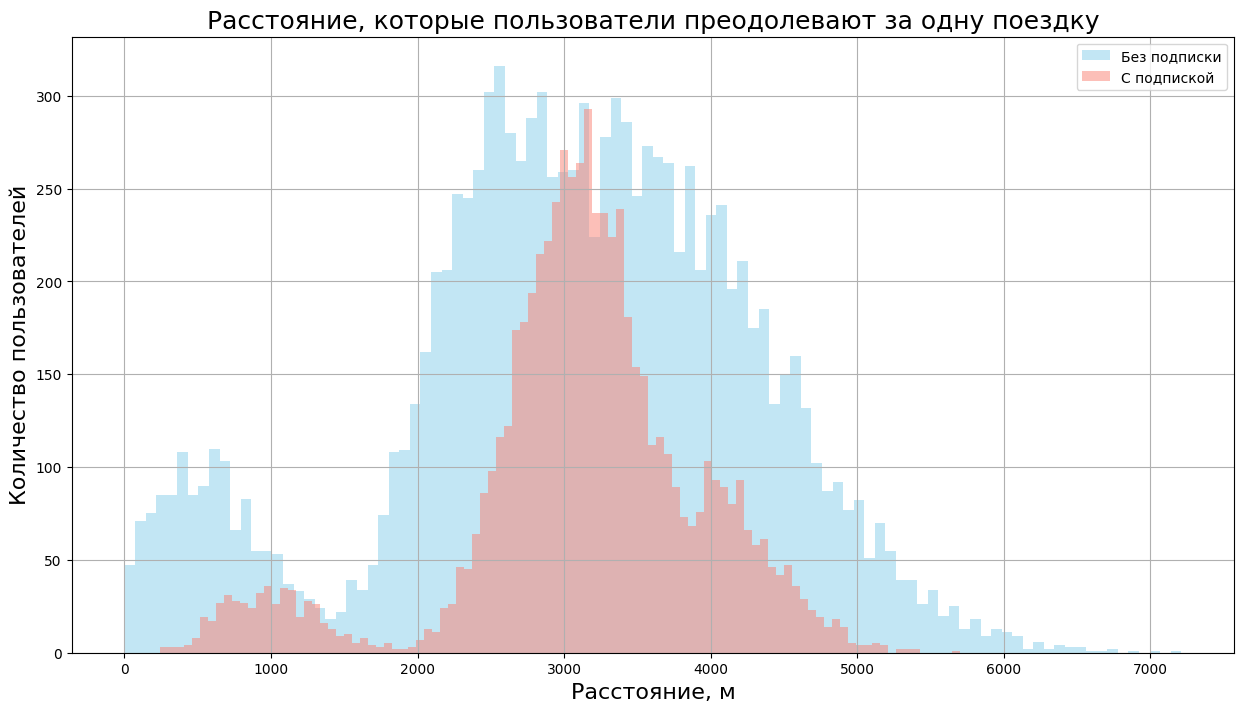

In [322]:
plt.figure(figsize=(15, 8))

# Построение гистограммы для пользователей без подписки
plt.hist(rides_without_subscription['distance'], bins=100, color='skyblue', alpha=0.5, label='Без подписки')

# Построение гистограммы для пользователей с подпиской
plt.hist(rides_with_subscription['distance'], bins=100, color='salmon', alpha=0.5, label='С подпиской')

plt.title('Расстояние, которые пользователи преодолевают за одну поездку', fontsize=18)
plt.xlabel('Расстояние, м', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.legend()
plt.grid(True) 

plt.show()

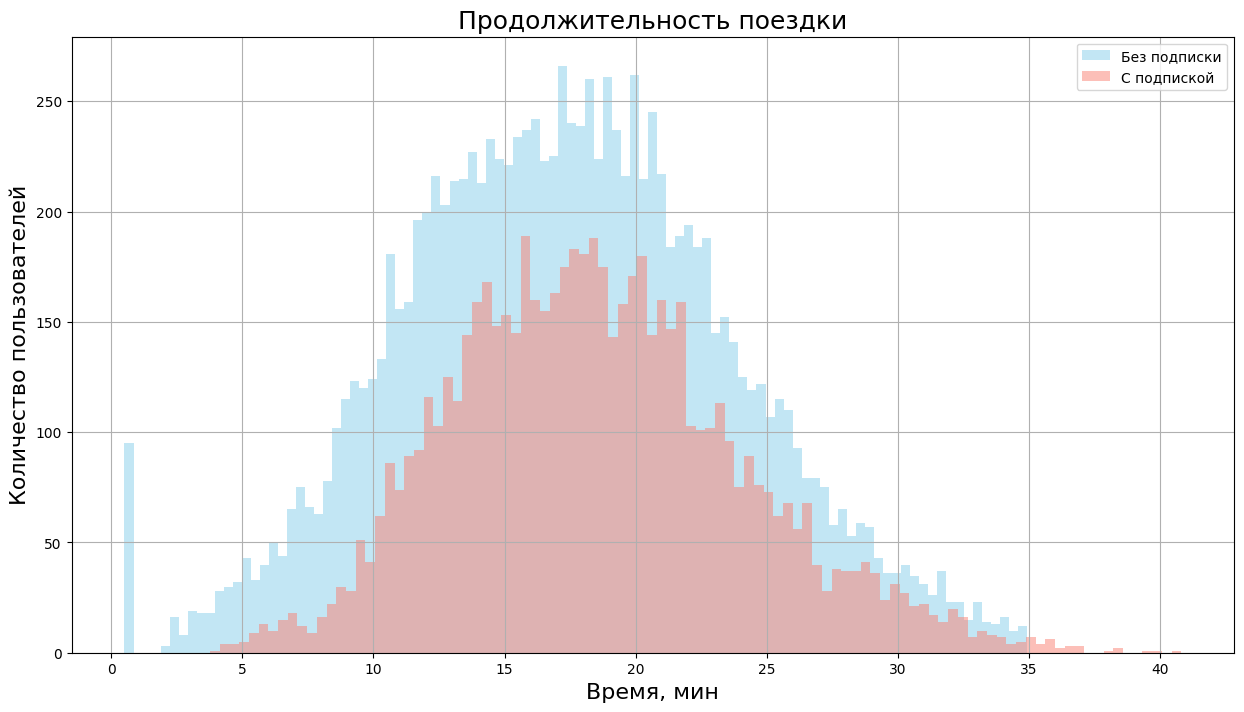

In [323]:
plt.figure(figsize=(15, 8))

# Построение гистограммы для пользователей без подписки
plt.hist(rides_without_subscription['duration'], bins=100, color='skyblue', alpha=0.5, label='Без подписки')

# Построение гистограммы для пользователей с подпиской
plt.hist(rides_with_subscription['duration'], bins=100, color='salmon', alpha=0.5, label='С подпиской')

plt.title('Продолжительность поездки', fontsize=18)
plt.xlabel('Время, мин', fontsize=16)
plt.ylabel('Количество пользователей', fontsize=16)
plt.legend()
plt.grid(True) 

plt.show()

Расстояние за одну поездку:  Пользователи без подписки чаще совершают поездки длиннее 5000 м. На графиках продолжаем наблюдать 2 пика данных, однако у пользователей без подписки коротких поездок больше. 

Время одной поездки: На графике пользователей без подписки хорошо заметны экстремально короткие поездки, в то время как у пользователей с подпиской их нет. Возможно, это происходит в результате ошибок пользователей без подписки, впервые использующих приложение.  Пользователи с подпиской чаще совершают более длительные поездки более 35 мин.

Сравним статистики данных пользователей, использующих и не использующих подписку, при помощи метода describe.

In [324]:
data.groupby('subscription_type')[['distance', 'duration', 'month_number', 'age']].describe().T

subscription_type       free    ultra
distance     count 11,568.00 6,500.00
             mean   3,045.50 3,115.45
             std    1,246.17   836.90
             min        0.86   244.21
             25%    2,366.56 2,785.44
             50%    3,114.65 3,148.64
             75%    3,905.70 3,560.57
             max    7,211.01 5,699.77
duration     count 11,568.00 6,500.00
             mean      17.39    18.54
             std        6.33     5.57
             min        0.50     3.76
             25%       12.96    14.52
             50%       17.33    18.18
             75%       21.59    21.88
             max       34.95    40.82
month_number count 11,568.00 6,500.00
             mean       6.52     6.42
             std        3.45     3.41
             min        1.00     1.00
             25%        4.00     4.00
             50%        7.00     6.00
             75%        9.00     9.00
             max       12.00    12.00
age          count 11,568.00 6,500.00
             mean      24.89    24.89
             std        4.48     4.76
             min       12.00    12.00
             25%       22.00    22.00
             50%       25.00    25.00
             75%       28.00    28.00
             max       43.00    38.00

Сравним характеристики пользователей с подпиской и без нее:

- расстояние, преодолеваемое за одну поездку: схожие средние и медианные значения, по данным с подпиской немного выше. Разброс значений расстояний для пользователей без подписки больше (стандартное отклонение выше, границы межквартильного размаха шире в обе стороны), минимальное значение намного ниже, максимальное - намного больше, чем у пользователей с подпиской;

- продолжительность одной поездки: схожие средние и медианные значения, по данным с подпиской немного выше. Разброс значений продолжительности для пользователей без подписки больше (стандартное отклонение выше, шире границы межквартильного размаха), минимальное значение ниже у пользователей без подписки, максимальное - выше у пользователей с подпиской;

- месяц совершения поездки: медианный месяц для данных о пользователях без подписки - июль, с подпиской - июнь;

- возраст: равные значения минимального, среднего и медианного возраста, одинаковые границы межквартильного размаха. Данные по пользователям с подпиской имеют немного большее стандартное отклонение. Максимальный возраст (43 года) - у пользователей без подписки.

__Промежуточный вывод__:
- Мы объединили данные о пользователях, поездках и подписках в один датафрейм, размерность которого - 18068 записей, 12 столбцов. Пропущенных значений нет.
- Создали два датафрейма c данными о пользователях без подписки и с данными о пользователях с подпиской. Размерность таблицы, содержащей данные о пользователях без подписки - 11568 записей, таблицы, содержащей данный о пользователях с подпиской - 6500 записей. Суммарное количество записей не изменилось, пропущенных значений нет.
- Построили графики расстояния и времени поездок для пользователей обеих категорий. Пользователи без подписки чаще совершают поездки длиннее 5000 м. На графиках продолжаем наблюдать 2 пика данных, однако у пользователей без подписки коротких поездок больше. Пользователи с подпиской чаще совершают более длительные поездки более 35 мин. На графике пользователей без подписки хорошо заметны экстремально короткие поездки, в то время как у пользователей с подпиской их нет. Возможно, это происходит в результате ошибок пользователей без подписки, впервые использующих приложение.
- Сравнили характеристики данных о пользователях с подпиской и без нее. Расстояние, преодолеваемое за одну поездку: схожие средние и медианные значения, по данным с подпиской немного выше. Разброс значений расстояний для пользователей без подписки больше (стандартное отклонение выше, границы межквартильного размаха шире в обе стороны), минимальное значение намного ниже, максимальное - намного больше, чем у пользователей с подпиской. Продолжительность одной поездки: схожие средние и медианные значения, по данным с подпиской немного выше. Разброс значений продолжительности для пользователей без подписки больше (стандартное отклонение выше, шире границы межквартильного размаха), минимальное значение ниже у пользователей без подписки, максимальное - выше у пользователей с подпиской. Месяц совершения поездки: медианный месяц для данных о пользователях без подписки - июль, с подпиской - июнь. Возраст: равные значения минимального, среднего и медианного возраста, одинаковые границы межквартильного размаха. Данные по пользователям с подпиской имеют немного большее стандартное отклонение. Максимальный возраст (43 года) - у пользователей без подписки.

<a name="подсчет-выручки"></a>
#### Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [325]:
data_rides = (
    data
    .groupby(['user_id', 'month_number'])
    .agg(
        number_of_rides=('distance', 'count'),
        total_distance=('distance', 'sum'),
        total_duration=('duration', 'sum'),
        round_duration=('duration', lambda x: sum(np.ceil(x))),
        age =('age', 'first'),
        city =('city', 'first'),
        subscription_type =('subscription_type', 'first'),
        minute_price =('minute_price', 'first'),
        start_ride_price =('start_ride_price', 'first'),
        subscription_fee =('subscription_fee', 'first'),
    )
)
data_rides.head(15)

number_of_rides  total_distance  total_duration  \
user_id month_number                                                    
1       1                           2        7,027.51           41.42   
        4                           1          754.16            6.23   
        8                           2        6,723.47           44.78   
        10                          2        5,809.91           31.58   
        11                          3        7,003.50           53.40   
        12                          2        6,751.63           27.20   
2       3                           3       10,187.72           60.96   
        4                           2        6,164.38           39.05   
        6                           1        3,255.34           13.85   
        7                           2        6,780.72           46.17   
        8                           1          923.01            6.91   
        10                          1        2,824.64           18.78   
        12                          1        3,828.25           11.92   
3       1                           1        3,061.78           12.65   
        2                           2        5,421.15           37.57   

                      round_duration  age    city subscription_type  \
user_id month_number                                                  
1       1                      42.00   22  Тюмень             ultra   
        4                       7.00   22  Тюмень             ultra   
        8                      46.00   22  Тюмень             ultra   
        10                     32.00   22  Тюмень             ultra   
        11                     56.00   22  Тюмень             ultra   
        12                     28.00   22  Тюмень             ultra   
2       3                      63.00   31    Омск             ultra   
        4                      40.00   31    Омск             ultra   
        6                      14.00   31    Омск             ultra   
        7                      48.00   31    Омск             ultra   
        8                       7.00   31    Омск             ultra   
        10                     19.00   31    Омск             ultra   
        12                     12.00   31    Омск             ultra   
3       1                      13.00   20  Москва             ultra   
        2                      39.00   20  Москва             ultra   

                      minute_price  start_ride_price  subscription_fee  
user_id month_number                                                    
1       1                        6                 0               199  
        4                        6                 0               199  
        8                        6                 0               199  
        10                       6                 0               199  
        11                       6                 0               199  
        12                       6                 0               199  
2       3                        6                 0               199  
        4                        6                 0               199  
        6                        6                 0               199  
        7                        6                 0               199  
        8                        6                 0               199  
        10                       6                 0               199  
        12                       6                 0               199  
3       1                        6                 0               199  
        2                        6                 0               199

Проверим, не появились ли пропуски в агрегированных данных.

In [326]:
data_rides.isna().sum()

number_of_rides      0
total_distance       0
total_duration       0
round_duration       0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет.

Добавим в получившийся датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа (в большую сторону).

In [327]:
# Функция для вычисления ежемесячной выручки
def calculate_monthly_revenue(row):
    """
    Функция вычисляет значение ежемесячной выручки.

    Параметры:
        row (pd.Series): Строка DataFrame, содержащая:
            - start_ride_price: цена начала поездки
            - number_of_rides: количество поездок
            - minute_price: стоимость минуты поездки
            - round_duration: общая длительность поездок (в минутах, округленная)
            - subscription_fee: абонентская плата

    Возвращает:
        float: Общая выручка за месяц
        
    """
    return (
        row['start_ride_price'] * row['number_of_rides'] +
        row['minute_price'] * row['round_duration'] + row['subscription_fee']
    )

In [328]:
data_rides['monthly_revenue'] = data_rides.apply(calculate_monthly_revenue, axis=1) 

In [329]:
data_rides.groupby('subscription_type')['monthly_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription_type,,,,,,,,
free,"6,798.00",328.64,183.87,58.00,194.00,274.00,428.00,"1,444.00"
ultra,"4,533.00",362.79,88.26,223.00,301.00,337.00,409.00,955.00


In [330]:
# посчитаем суммарную выручку
print('Суммарная выручка:', data_rides["monthly_revenue"].sum())
print('Доход от пользователей без подписки:',
      data_rides[data_rides["subscription_type"] == "free"]["monthly_revenue"].sum())
print('Доход от пользователей c подпиской:',
      data_rides[data_rides["subscription_type"] == "ultra"]["monthly_revenue"].sum())

Суммарная выручка: 3878641.0
Доход от пользователей без подписки: 2234104.0
Доход от пользователей c подпиской: 1644537.0


__Промежуточный вывод__:
- Мы cоздали датафрейм с агрегированными данными о поездках: суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц, убедились, что пропущенные значения отсутствуют. 
- Вычислили суммарный доход за каждый месяц для каждого пользователя. Суммарная выручка составила 3878641 руб., из них доход от пользователей без подписки - 2234104 руб., от пользователей c подпиской - 1644537 руб.
- Несмотря на преобладающее количество записей о поездках без подписки, среднее значение выручки за месяц от этой группы составило 328,64 руб против  362.79 руб от пользователей с подпиской. Медианные значения имеют более весомое различие - 274 руб и 337 руб соответственно. Большее значение стандартного отклонения указывает на больший разброс данных вокруг среднего значения для пользователей без подписки. 


#### Проверка гипотез

Важно понять, __тратят ли пользователи с подпиской больше времени на поездки__? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

Нулевая гипотеза 𝐻0 - средние значения времени, затрачиваемого на поездки пользователями с подпиской, и времени, затрачиваемого на поездки пользователями  без подписки, равны.

Альтернативная гипотеза 𝐻1 - среднее значение времени, затрачиваемого на поездки пользователями с подпиской, больше среднего значения времени, затрачиваемого на поездки пользователями без подписки.

Воспользуемся специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. 

In [331]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    rides_with_subscription['duration'], rides_without_subscription['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
# при проведении теста с equal_var=False нулевая гипотеза также отвергается

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Получившееся p-value, равное 1.2804098316645618e-34, крайне мало и стремится к нулю. На языке статистики это означает, что если гипотеза 𝐻0 верна, то вероятность получить наблюдаемое на выборке значение или более далёкое от предположенного в 𝐻0 также стремится к нулю. Средние значения времени, затрачиваемого на поездки пользователями с подпиской, и времени, затрачиваемого на поездки пользователями без подписки, различаются статистически значимо.      

P-value меньше выбранного уровня статистической значимости, отвергаем нулевую гипотезу в пользу альтернативной. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

Стоимость старта для пользователей с подпиской равна нулю, поэтому с точки зрения бизнеса выгодно, что пользователи с подпиской тратят больше времени на поездки: чем больше затрачено времени, тем больше доход от этой группы пользователей. Как дополнительный плюс стоит отметить, что оборудование не простаивает в это время. 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что __среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров__? Проверим гипотезу.

Нулевая гипотеза 𝐻0 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза 𝐻1 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

Воспользуемся специальным методом для проверки правосторонней гипотезы. 

In [333]:
optimal_value = 3130

# задаём уровень значимости
alpha = 0.05 

# проводим односторонний тест вправо
results = st.ttest_1samp(rides_with_subscription['distance'], optimal_value, alternative='greater')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


P-value больше выбранного уровня статистической значимости. При верной нулевой гипотезе вероятность получить наблюдаемое значение или более удалённое от того, которое предположили в 𝐻0, составляет почти 92%. По результатам теста мы не можем отвергнуть нулевую гипотезу, данные ей не противоречат.

Среднее расстояние поездок пользователей с подпиской не превышает оптимального с точки зрения износа самоката. Это позволяет более точно спрогнозировать сроки планового обслуживания и замены оборудования.

Проверим гипотезу о том, __будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки__. 


Нулевая гипотеза 𝐻0 - средняя помесячная выручка от пользователей с подпиской по месяцам равна средней помесячной выручке от пользователей без подписки.

Альтернативная гипотеза 𝐻1 - средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки.

Воспользуемся специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [334]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    data_rides[data_rides["subscription_type"] == "ultra"]['monthly_revenue'],
    data_rides[data_rides["subscription_type"] == "free"]['monthly_revenue'],
    alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
# при проведении теста с equal_var=False нулевая гипотеза также отвергается

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


P-value меньше выбранного уровня статистической значимости. 
При верной нулевой гипотезе, вероятность получить наблюдаемые в исследовании или более экстремальные результаты стремится к нулю. Средние значения двух выборок различаются статистически значимо.
По результатам теста мы отвергаем нулевую гипотезу в пользу альтернативной.

Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки. Это является положительном моментом для сервиса, означает более стабильный доход от этой группы пользователей, что можно учитывать при планировании финансовой деятельности. 

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест понадобится для проверки этой гипотезы?

Нам необходимо проанализировать одну генеральную совокупность, с которой произошли изменения, т.е. проверить, равны ли средние совокупности до и после обновления (гипотеза о равенстве средних для зависимых выборок).

Нулевая гипотеза 𝐻0: количество обращений в техподдержку до и после обновлений равны.
Альтернативная гипотеза 𝐻1 (левосторонняя) -  количество обращений в техподдержку после обновлений значимо снизилось.


Тест: st.ttest_rel(before, after, alternative=’greater’)

Проведем тест на случайно сгенерированных данных. Для генерации случайных чисел будем считать, что минимальное количество обращений - 0, максимальное - 30, количество клиентов - 5000.

In [335]:
min_number_of_requests = 0
max_number_of_requests = 30
number_of_clients = 5000

# задаём уровень значимости
alpha = 0.05

np.random.seed(55)  # Установка seed для воспроизводимости результатов
before_update = np.random.randint(min_number_of_requests, max_number_of_requests + 1, size=number_of_clients)
after_update = np.random.randint(min_number_of_requests, max_number_of_requests + 1, size=number_of_clients)

# проводим ttest для двух выборок до и после обновления
results = st.ttest_rel(before_update, after_update, alternative='greater')

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. \
Есть статистически значимое снижение количества обращений в техподдержку после обновления.")
else:
    print("Не отвергаем нулевую гипотезу. \
Нет статистически значимого снижения количества обращений в техподдержку после обновления.")

0.029588161848699293
Отвергаем нулевую гипотезу. Есть статистически значимое снижение количества обращений в техподдержку после обновления.


Для наших вымышленных выборок мы отвергаем нулевую гипотезу в пользу альтернативной, т.к. p-value меньше выбранного уровня статистической значимости. Похоже, что обновление серверов прошло успешно и количество обращений в техподдержку снизилось. 

__Промежуточный вывод__:

Результаты проверки гипотез говорят в пользу следующего:
- Пользователи с подпиской тратят больше времени на поездки. Стоимость старта для пользователей с подпиской равна нулю, поэтому с точки зрения бизнеса выгодно, что пользователи с подпиской тратят больше времени на поездки: чем больше затрачено времени, тем больше доход от этой группы пользователей. Как дополнительный плюс стоит отметить, что оборудование не простаивает в это время.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. То, что среднее расстояние поездок пользователей с подпиской не превышает оптимального с точки зрения износа самоката, позволяет более точно спрогнозировать сроки планового обслуживания и замены оборудования.
- Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки. Это является положительном моментом для сервиса, означает более стабильный доход от этой группы пользователей, что можно учитывать при планировании финансовой деятельности. 
- При необходимости проверить снижение количества обращений с службу поддержки после обновлений на основе выборок данных о количестве обращений до и после обновлений для каждого пользователя проведем тест `st.ttest_rel(before, after, alternative=’greater’)`.

Это говорит о целесообразности увеличения количества пользователей с подпиской. 

#### Распределения

_Задание 1_

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Эту ситуацию описывает __биномиальное распределение__:
- каждая выдача промокода - эксперимент Бернулли с двумя исходами: пользователь либо продлит подписку, либо нет;
- фиксированное количество попыток - число разданных промокодов;
- вероятность успеха одинакова для всех попыток (10% или 0.1);
- попытки независимы между собой.

Попробуем постепенно изменять значение попыток n (начнем со 100, т.к. нам нужно не менее 100 подписок) и вычислять  вероятность получения k новых клиентов (k=100). Когда вероятность будет не менее 95%, остановимся.

In [336]:
from scipy.stats import binom
k = 100
n = 100
p = 0.1 
target_prob = 0.95 # вероятность того, что подпишется 100 или больше человек
while (1 - binom.cdf(k, n, p) < target_prob): 
    n += 1
print(f'Искомое количество испытаний {n}. Вероятность {k} успехов из {n} попыток - {1 - binom.cdf(k, n, p)}.')

Искомое количество испытаний 1172. Вероятность 100 успехов из 1172 попыток - 0.9504520478979693.


При рассылке __1172 писем__, при условии вероятности подписки по результату каждого письма равной 10%, вероятность того, что 100 клиентов продлят подписку, составляет 95%.

__Параметры__ получившегося биномиального распределения:
- __n__ - число испытаний - 1172
- __p__ - вероятность успеха в одном испытании - 0.1

Построим график распределения.

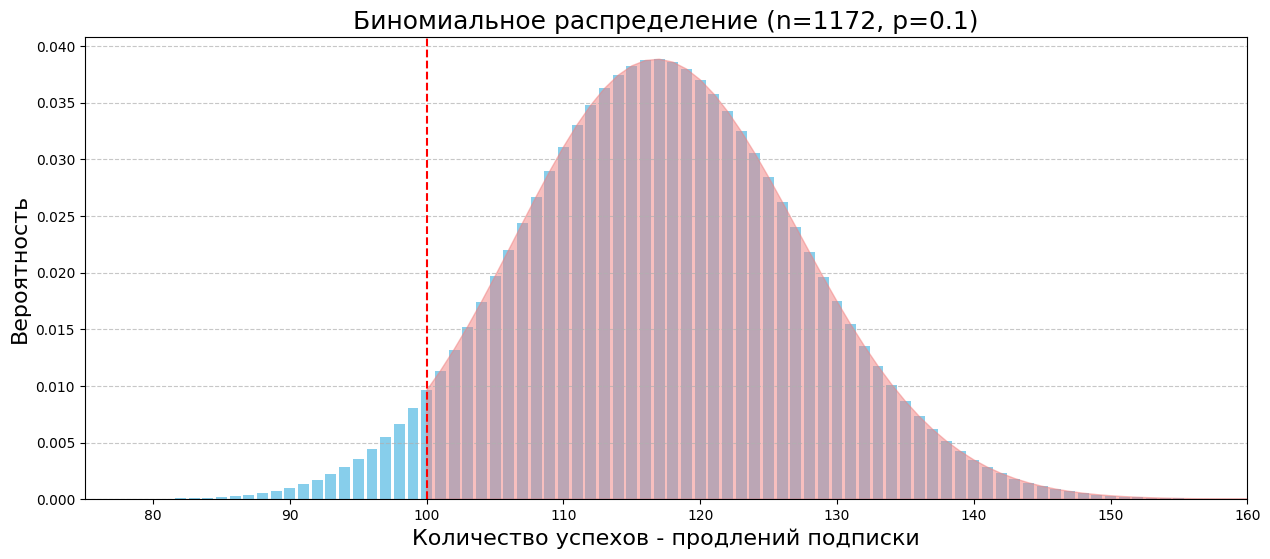

In [337]:
n = 1172 # количество попыток
p = 0.1 # вероятность успеха

distr = [binom.pmf(k, n, p) for k in range(n + 1)]

plt.figure(figsize=(15, 6))
plt.bar(range(0, n + 1), distr, color='skyblue')
plt.title('Биномиальное распределение (n=1172, p=0.1)', fontsize=18)
plt.xlabel('Количество успехов - продлений подписки', fontsize=16)
plt.ylabel('Вероятность', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(75, 160)  # настройка интервала оси x
plt.axvline(x=100, color='red', linestyle='--', label='Successes >= 100')
# Закрашиваем область для значений >= 100
plt.fill_between(range(100, n + 1), 0, distr[100:], color='lightcoral', alpha=0.5)
plt.show()

Построим график, на котором отобразим зависимость вероятности продления 100 подписок от числа выданных промокодов.

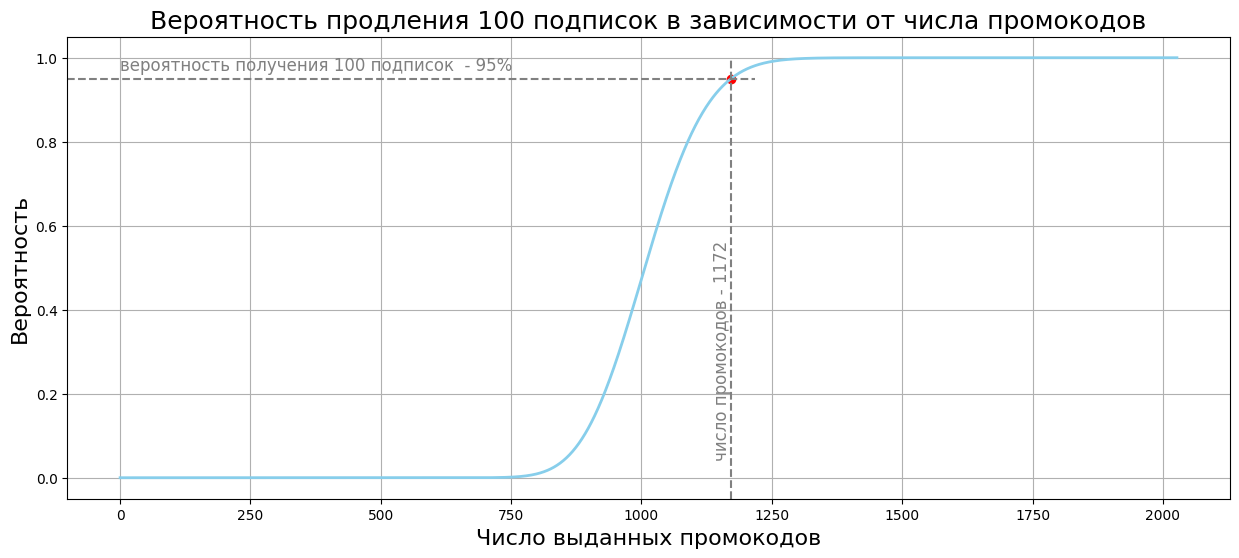

In [338]:
p = 0.1 # вероятность успеха
k = 100 # количество успехов
n = 0 # количество попыток

cdf_values =[]

while True:
    cdf = 1 - binom.cdf(k, n, p)
    cdf_values.append(cdf)
    n += 1
    if cdf == 1:
        break
        
# Построение графика
plt.figure(figsize=(15, 6))
plt.plot(range(0, n), cdf_values, color='skyblue', linewidth=2)
plt.title('Вероятность продления 100 подписок в зависимости от числа промокодов', fontsize=18)
plt.xlabel('Число выданных промокодов', fontsize=16)
plt.ylabel('Вероятность', fontsize=16)
plt.grid(True)

plt.scatter(1172, 0.95, color='red')

# добавим линии на оси x и y от точки (1172, 0.95)
plt.axhline(y=0.95, color='gray', linestyle='--', xmax=1200/n)
plt.axvline(x=1172, color='gray', linestyle='--', ymax=0.95)
plt.text(0, 0.97, 'вероятность получения 100 подписок  - 95%', color='grey', fontsize=12)
plt.text(1137, 0.05, 'число промокодов - 1172', color='grey', fontsize=12, rotation=90)

plt.show()

_Задание 2_

 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Мы имеем биномиальное распределение со следующими параметрами:
- __n__ - число испытаний - 1 000 000
- __p__ - вероятность успеха в одном испытании - 0.4  

Приступим к аппроксимации.

Математическое ожидание и стандартное отклонение нормального распределения, которым аппроксимируют биномиальное,  берутся равными математическому ожиданию и стандартному отклонению этого биномиального распределения.

Проверим выполнение условия хорошей аппроксимации биномиального распределения нормальным.  Нужно взять промежуток от математического ожидания биномиального распределения плюс-минус три его стандартных отклонения. Если он лежит в пределах [0,𝑛] (то есть там, где биномиальное распределение определено), то его форма будет симметрична и близка к нормальному распределению.

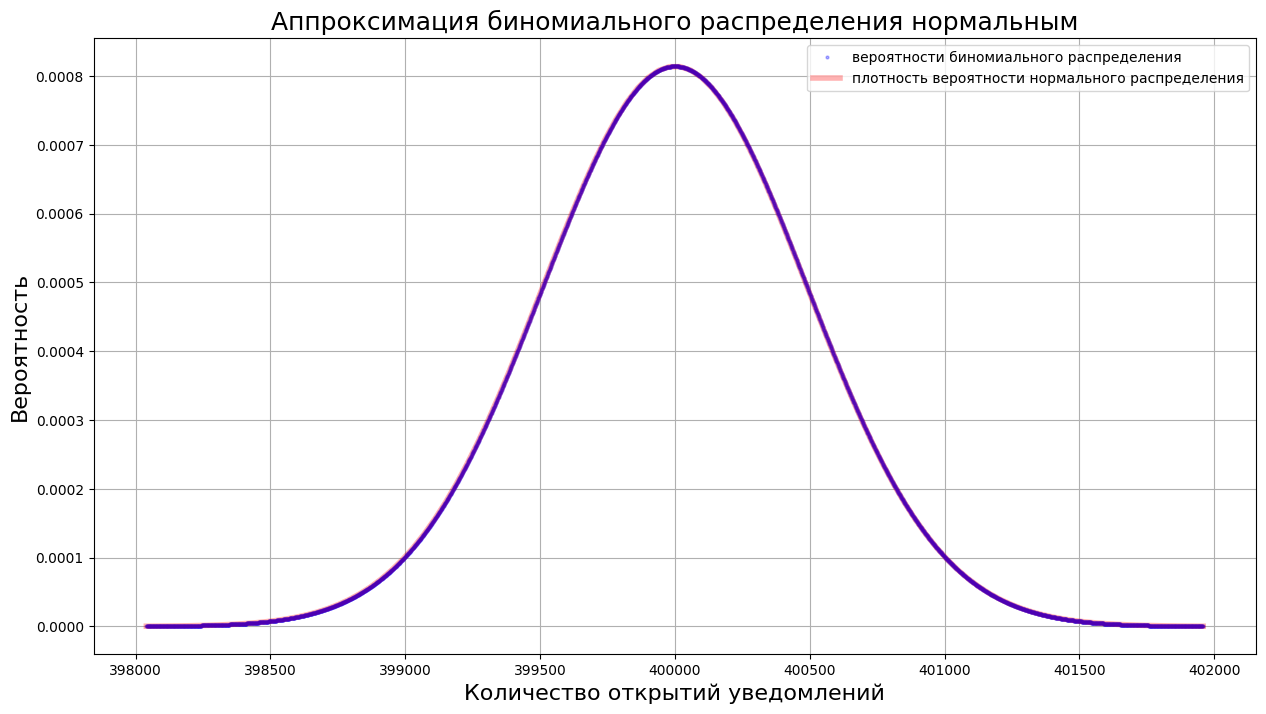

Условие аппроксимации выполняется.


In [339]:
# функция используется для визуализации нормального распределения
def linspace(start, stop, num):
    """
    Функция выдаёт num чисел, равномерно распределённых от start до stop.
    """
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1_000_000
p = 0.4

# вычисляем границы промежутка, в котором будем строить аппроксимацию 
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
plt.figure(figsize=(15, 8))
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=2, label='вероятности биномиального распределения', alpha=0.3)

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 4 и прозрачности 0.3
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=4, alpha=0.3,
        label='плотность вероятности нормального распределения')

ax.set_xlabel('Количество открытий уведомлений', fontsize = 16)
ax.set_ylabel('Вероятность', fontsize = 16)
ax.set_title('Аппроксимация биномиального распределения нормальным', fontsize = 18)
# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.grid(True)
plt.show()

# выводим, выполняется ли условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие аппроксимации выполняется.')
else:
    print('Условие аппроксимации не выполняется.')

Оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [340]:
# считаем вероятность получить значение, равное 399,5 тыс или меньше 
probability = st.norm.cdf(399500, mu, sigma)

print(f'Вероятность получить значение, равное 399,5 тыс или меньше, равно {probability:.2f}.')

Вероятность получить значение, равное 399,5 тыс или меньше, равно 0.15.


Вероятность получить значение, равное 399,5 тыс или меньше, равно 0.15. Значит, вероятность открытия более 399,5 тысяч уведомлений из 1 млн равна 85%. Это довольно высокий показатель, с большой долей вероятности около 60% уведомлений будут открыты. Однако для более правильной оценки необходимо учесть дополнительную информацию, такую как затраты на рассылку уведомлений и размер выручки, которую приносят пользователи, открывшие уведомления. 

__Промежуточный вывод__:

1. Мы определили __параметры__ получившегося биномиального распределения:
- __n__ - число испытаний - 1172
- __p__ - вероятность успеха в одном испытании - 0.1

и построили его график. 
Минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план по продлению подписки минимум 100 пользователями была примерно 5%, при заданных условиях составляет __1172__. Построили график зависимости вероятности продления 100 подписок от числа выданных промокодов.

2. Мы аппроксимировали заданное биномиальное распределение нормальным и визуализировали это. Вычислили, что вероятность того, что при рассылке 1 млн уведомлений при заданных условиях уведомление откроют не более 399,5 тыс. пользователей, составляет __15%__.  

Значит, вероятность открытия более 399,5 тысяч уведомлений из 1 млн равна 85%. Это довольно высокий показатель, с большой долей вероятности около 60% уведомлений будут открыты. Однако для более правильной оценки необходимо учесть дополнительную информацию, такую как затраты на рассылку уведомлений и размер выручки, которую приносят пользователи, открывшие уведомления. 

#### Общий вывод

Исследование проводилось с использованием данных сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Мы осуществили загрузку трех датасетов: о пользователях, поездках и подписках. Пропущенные значения не были обнаружены, названия столбцов корректны. Парсинг столбца, в котором хранится дата поездки, осуществлен во время загрузки датасета `rides`.

Во время предобработки cоздали столбец `month_number` с номером месяца на основе столбца `date`; убедились, что пропущенные значения отсутствуют; проверили текстовые значения, осуществили в именах пользователей замену _е_ на _ё_. Удалили явные дубликаты в датасете `users`, количество строк сократилось с 1565 до 1534. 

Мы изучили и визуализировали общую информацию о пользователях и поездках: 
- Выборка покрывает период с 01.01.2021 по 30.12.2021, данные есть за каждый месяц.
- В выборке представлена информация о пользователях из 8 городов: Тюмени, Омска, Москвы, Ростова-на-Дону, Краснодара, Пятигорска, Екатеринбурга и Сочи. Больше всего в выборке пользователей из Пятигорска - 14.28%, меньше всего - из Москвы - 10.95%.
- В выборке больше пользователей без подписки - 835 (54.43%) против 699 (45.57%) пользователей с подпиской. Для нашей выборки число пользователей без подписки всегда превышает либо равно числу пользователей с подпиской независимо от города. Для Омска и Москвы число пользователей обеих категорий практически равно. Наибольшая разница наблюдается для Пятигорска и Краснодара.
- Численность населения Москвы во много раз превышает численность населения в других городах, но, при этом, меньше всего пользователей из этого города. Вместе с тем, в Пятигорске ситуация обратная. Мы анализировали ситуацию за 2021 год, стоит повторить анализ на более свежих данных и, в случае повторения ситуации, изучить причины низкого количества пользователей в Москве и рассмотреть вопрос о привлечении целевой аудитории в этом городе к использованию сервиса.
- Возраст пользователей находится в диапазоне от 12 до 43 лет. Мода сопадает с медианным значением и составляет 25 лет. Средний возраст - 24.9. Возраст половины пользователей находится в диапазоне от 22 до 28 лет. Редкими значениями является возраст пользователей младше 13 лет и старше 37. Размах равен 31 год, межквартильный размах - 6 лет. Дисперсия - 20.89 лет². Стандартное отклонение - 4.57 лет.
- Значения расстояний, преодолеваемых пользователем за одну поездку, распределены в диапазоне от 0.86 до 7,211.01 м. Медианное значение - 3,133.61 м, среднее - 3,070.66 м. Дисперсия равна 1247242.91 кв.м, стандартное отклонение - 1,116.83 м. Размах равен 7210.15 м, межквартильный размах - 1233.00 м. Половина значений находится в диапазоне от 2,543.23 м до 3,776.22 м. На гистограмме выделяются два холма, первый - более короткие поездки, приблизительно до 1500 м с пиком около 650 м, второй, соответственно, более 1500 м с пиком около 3100 м. Появление двух холмов требует дополнительного анализа, много факторов могли стать причиной этого: наличие инфраструктуры в конкретной местности, наличие развитой сети общественного транспорта, например, одной из причин появления отдельного пика для коротких поездок может быть цель пользователя - добраться до ближайшей станции метро либо другого общественного транспорта, также это может быть связано с пробными заездами новых пользователей. Стоит отметить, что пользователи без подписки совершили в 2,8 раза больше поездок на короткие дистанции, в то время как для длинных дистанций разница в 1,7 раз.
- Значения продолжительности поездок распределены в диапазоне от 0.5 до 40.82 мин. Медианное значение - 17.68 мин, среднее - 17.81 мин. Дисперсия равна 37.10 мин², стандартное отклонение - 6.09 мин. Размах равен 40.32 мин, межквартильный размах - 8.13 мин.  Половина значений находится в диапазоне от 13.60 мин до 21.72 мин. Значения меньше 3 мин и более 34 мин встречаются очень редко. Распределение имеет форму колокола, симметрично, с одним пиком. Правило трех сигм выполняется. Можем сказать, что оно тяготеет к нормальному. Можно предположить, что поездки длиной до 3 минут - сбой приложения, либо пользователь передумал совершать поездку (например, приехал общественный транспорт, или резко испортилась погода).
- Количество поездок в сезонах изменяется незначительно, от 4410 до 4610, количество поездок весной и летом незначительно превышает количество поездок осенью и зимой, медианные значения, стандартные отклонения, границы межквартильного размаха для расстояний, преодолеваемых пользователем за одну поездку, длительности одной поездки, возраста пользователей, незначительно отличаются в разных сезонах. Самое низкое количество поездок для обеих групп пользователей в феврале и ноябре, максимальное количество поездок для пользователей с подпиской - в декабре(1003), сентябре(1002), январе(1001), для пользователей с подпиской - в мае(597). Данные указывают на довольно стабильное использование сервиса в разные сезоны с небольшим увеличением спроса весной и летом. Наблюдается снижение количества поездок в феврале и ноябре для пользователей независимо от наличия подписки.

Далее данные о пользователях, поездках и подписках мы объединили в один датафрейм, размерность которого - 18068 записей, 12 столбцов. Пропущенных значений нет.
Создали два датафрейма c данными о пользователях без подписки (11568 записей) и с данными о пользователях с подпиской (6500 записей), пропущенных значений нет.
Построили графики расстояния и времени поездок для пользователей обеих категорий. Пользователи без подписки чаще совершают поздки длиннее 5000 м. На графиках продолжаем наблюдать 2 пика данных, однако у пользователей без подписки коротких поездок больше. Пользователи с подпиской чаще совершают более длительные поездки более 35 мин. На графике пользователей без подписки хорошо заметны экстремально короткие поездки, в то время как у пользователей с подпиской их нет. Возможно, это происходит в результате ошибок пользователей без подписки, впервые использующих приложение.

Сравнили характеристики данных о пользователях с подпиской и без нее. Расстояние, преодолеваемое за одну поездку: схожие средние и медианные значения, по данным с подпиской немного выше. Разброс значений расстояний для пользователей без подписки больше (стандартное отклонение выше, границы межквартильного размаха шире в обе стороны), минимальное значение намного ниже, максимальное - намного больше, чем у пользователей с подпиской. Продолжительность одной поездки: схожие средние и медианные значения, по данным с подпиской немного выше. Разброс значений продолжительности для пользователей без подписки больше (стандартное отклонение выше, шире границы межквартильного размаха), минимальное значение ниже у пользователей без подписки, максимальное - выше у пользователей с подпиской. Месяц совершения поездки: медианный месяц для данных о пользователях без подписки - июль, с подпиской - июнь. Возраст: равные значения минимального, среднего и медианного возраста, одинаковые границы межквартильного размаха. Данные по пользователям с подпиской имеют немного большее стандартное отклонение. Максимальный возраст (43 года) - у пользователей без подписки.

Для подсчета выручки мы cоздали датафрейм с агрегированными данными о поездках: суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц, убедились, что пропущенные значения отсутствуют. Вычислили суммарный доход за каждый месяц для каждого пользователя. Суммарная выручка составила 3878641 руб., из них доход от пользователей без подписки - 2234104 руб., от пользователей c подпиской - 1644537 руб. Несмотря на преобладающее количество записей о поездках без подписки, среднее значение выручки за месяц от этой группы составило 329 руб. против 363 руб. от пользователей с подпиской. Медианные значения имеют более весомое различие - 274 руб. и 337 руб. соответственно. Большее значение стандартного отклонения указывает на больший разброс данных вокруг среднего значения для пользователей без подписки.

Мы проверили гипотезы и результат говорит о целесообразности увеличения количества пользователей с подпиской: 
- Пользователи с подпиской тратят больше времени на поездки. Стоимость старта для пользователей с подпиской равна нулю, поэтому с точки зрения бизнеса выгодно, что пользователи с подпиской тратят больше времени на поездки: чем больше затрачено времени, тем больше доход от этой группы пользователей. Как дополнительный плюс стоит отметить, что оборудование не простаивает в это время.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. То, что среднее расстояние поездок пользователей с подпиской не превышает оптимального с точки зрения износа самоката, позволяет более точно спрогнозировать сроки планового обслуживания и замены оборудования.
- Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя помесячная выручка от пользователей без подписки. Это является положительном моментом для сервиса, означает более стабильный доход от этой группы пользователей, что можно учитывать при планировании финансовой деятельности. 

При необходимости проверить снижение количества обращений с службу поддержки после обновлений на основе выборок данных о количестве обращений до и после обновлений для каждого пользователя проведем тест `st.ttest_rel(before, after, alternative=’greater’)`.

Во время работы с распределениями:
1. Мы определили __параметры__ получившегося биномиального распределения: число испытаний - 1172, вероятность успеха в одном испытании - 0.1, и построили его график. 
Минимальное количество промокодов, которое нужно разослать, чтобы вероятность не выполнить план по продлению подписки минимум 100 пользователями была примерно 5%, при заданных условиях составляет __1172__. Построили график зависимости вероятности продления 100 подписок от числа выданных промокодов.
2. Мы аппроксимировали заданное биномиальное распределение нормальным и визуализировали это. Вычислили, что вероятность того, что при рассылке 1 млн уведомлений при заданных условиях уведомление откроют не более 399,5 тыс. пользователей, составляет __15%__. 